In [ ]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Save figure function
import os
from pathlib import Path
from matplotlib import pyplot as plt
IMAGES_PATH = Path() / "IMAGES"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('scn_appeal_cases_data.csv')
df.head(10)

appeal_district trial_district              offence          sentence  \
0      North-West     North-West    Rape_sexual_abuse       Prison_term   
1      South-East     South-East        Armed_robbery             Death   
2     South-South    South-South      Damage_property  Prison_term_fine   
3     South-South    South-South  Murder_manslaughter             Death   
4      South-East        Missing              Missing   Payment_damages   
5         Missing        Missing  Fraud_impersonation   Payment_damages   
6      South-West        Missing        Armed_robbery             Death   
7      South-West        Missing  Unlawful_possession           Missing   
8             FCT        Missing              Missing           Missing   
9     South-South        Missing        Armed_robbery       Prison_term   

   no_complainant  no_male_complainant  no_female_complainant  no_appealant  \
0               1                    0                      1             1   
1               1                    1                      0             1   
2               1                    1                      0            10   
3               2                    0                      2             1   
4               1                    1                      0             2   
5               1                    1                      0             2   
6               1                    1                      0             1   
7               0                    0                      0             1   
8               1                    1                      0             1   
9               1                    1                      0             1   

   no_male_appealant  no_female_appealant  no_public_witness  no_eye_witness  \
0                  1                    0                  4               1   
1                  1                    0                  2               1   
2                 10                    0                  4               0   
3                  1                    0                  2               0   
4                  1                    0                 -1               0   
5                  2                    0                  0               0   
6                  4                    0                  0               0   
7                  1                    0                  0               0   
8                  1                    0                  0               0   
9                  1                    0                  2               0   

   no_defense_witness scn_decision  
0                   0    Dismissed  
1                   0    Dismissed  
2                   0    Dismissed  
3                   0    Dismissed  
4                   0    Dismissed  
5                   0    Dismissed  
6                   0    Dismissed  
7                   0    Dismissed  
8                   0    Dismissed  
9                   0    Dismissed

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='datasetprofiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['trial_district'].value_counts()

trial_district
Missing          1761
South-West       1360
South-South       590
South-East        441
North-Central     185
North-West        169
FCT               134
North-East         56
Name: count, dtype: int64

In [ ]:
df['offence'].value_counts()

offence
Dispute                             1157
Murder_manslaughter                  590
Missing                              578
Others                               422
Theft                                318
Armed_robbery                        217
Trespassing                          202
Civil_petition                       198
Unlawful_possession                  165
Law_of_tort                          164
Election_petition                    108
Fraud_impersonation                  104
Human_rights_violation               103
Unlawful_termination_appointment      82
Claim_for_recovery                    72
Curroption_abuse_office               69
Court_order_violation                 31
Conspiracy                            31
Rape_sexual_abuse                     30
Libel                                 30
Damage_property                       20
Wrongful_accusations                   5
Name: count, dtype: int64

In [ ]:
df['sentence'].value_counts()

sentence
Missing                    2018
Payment_damages             830
Death                       592
Appeal_granted              432
Prison_term                 332
Fine                        259
Appeal_dismissed            132
Others                       71
Prison_term_fine             19
Prison_term_hard_labour       9
Death\r                       1
Suspension_from_office        1
Name: count, dtype: int64

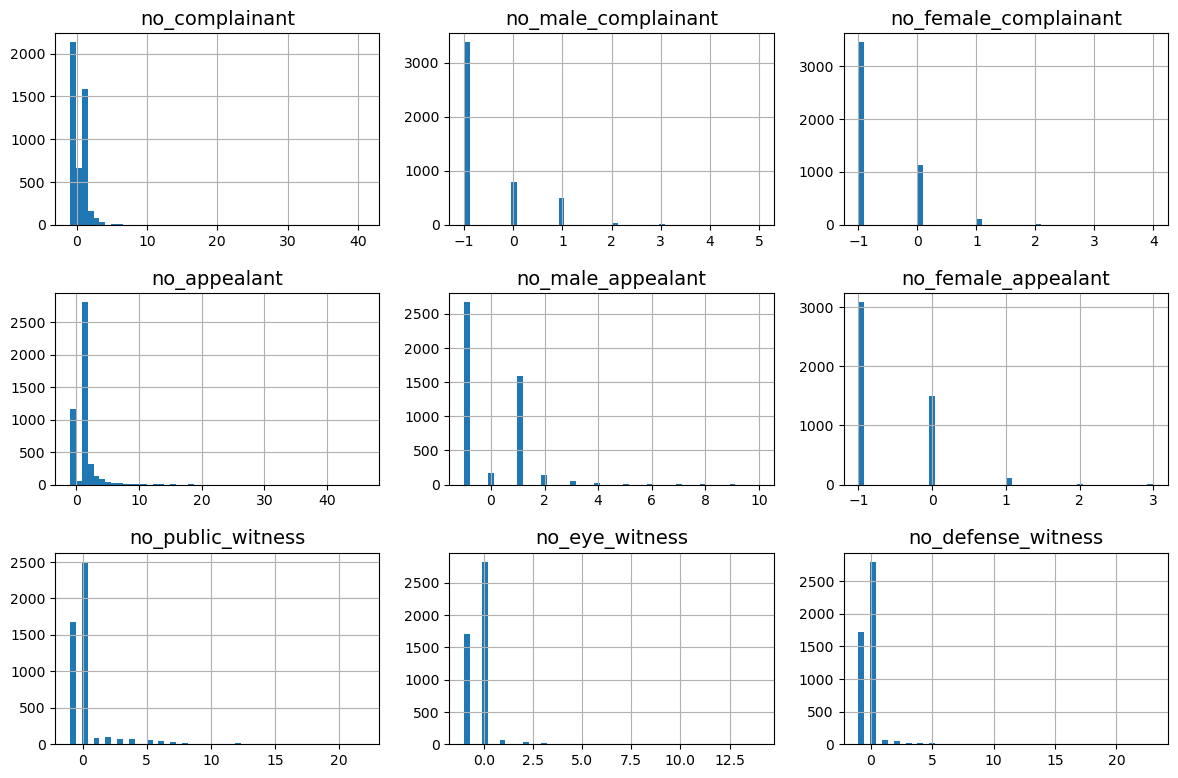

In [ ]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

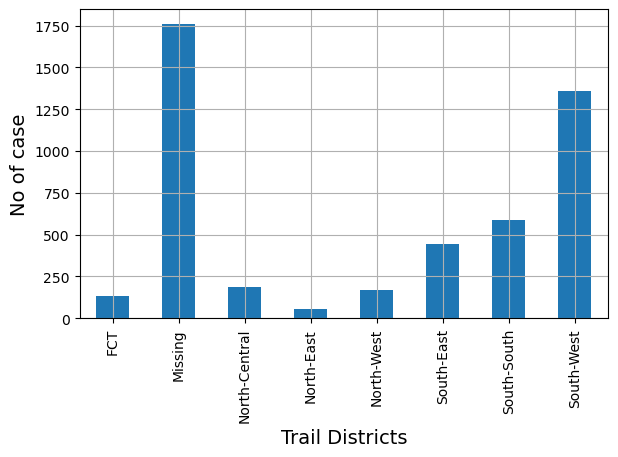

In [ ]:
df['trial_district'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Trail Districts")
plt.ylabel("No of case")
save_fig("No_of_case_per_district_bar_plot")  # extra code
plt.xticks(rotation=90)
save_fig("No_of_case_vs_trail_districts_bar_plot")
plt.show()

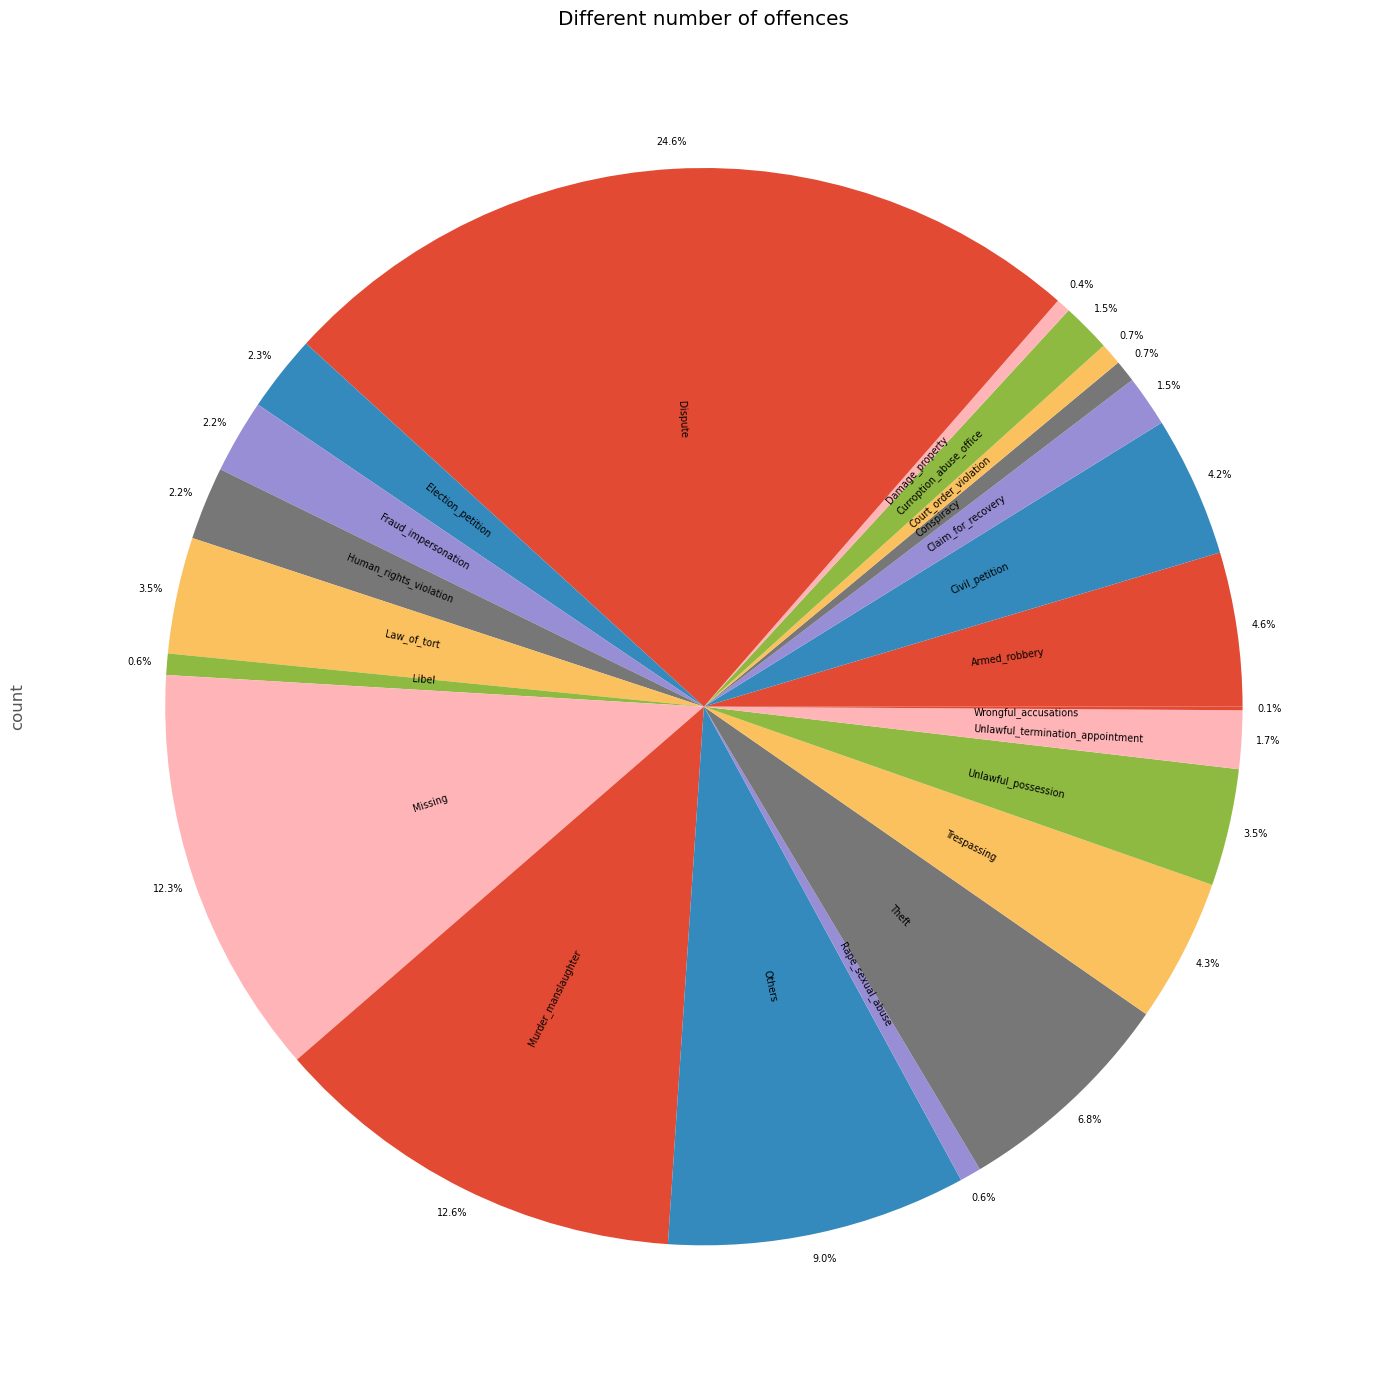

In [ ]:
plt.style.use('ggplot')
plot = df['offence'].value_counts().sort_index().plot.pie(textprops={'size': 'x-small'},autopct='%1.1f%%',pctdistance=1.05,rotatelabels = 290,labeldistance=.5);
plt.title('Different number of offences')
fig = plt.gcf();
fig.set_size_inches(14,14);
save_fig("No_of_offences_pie_plot")

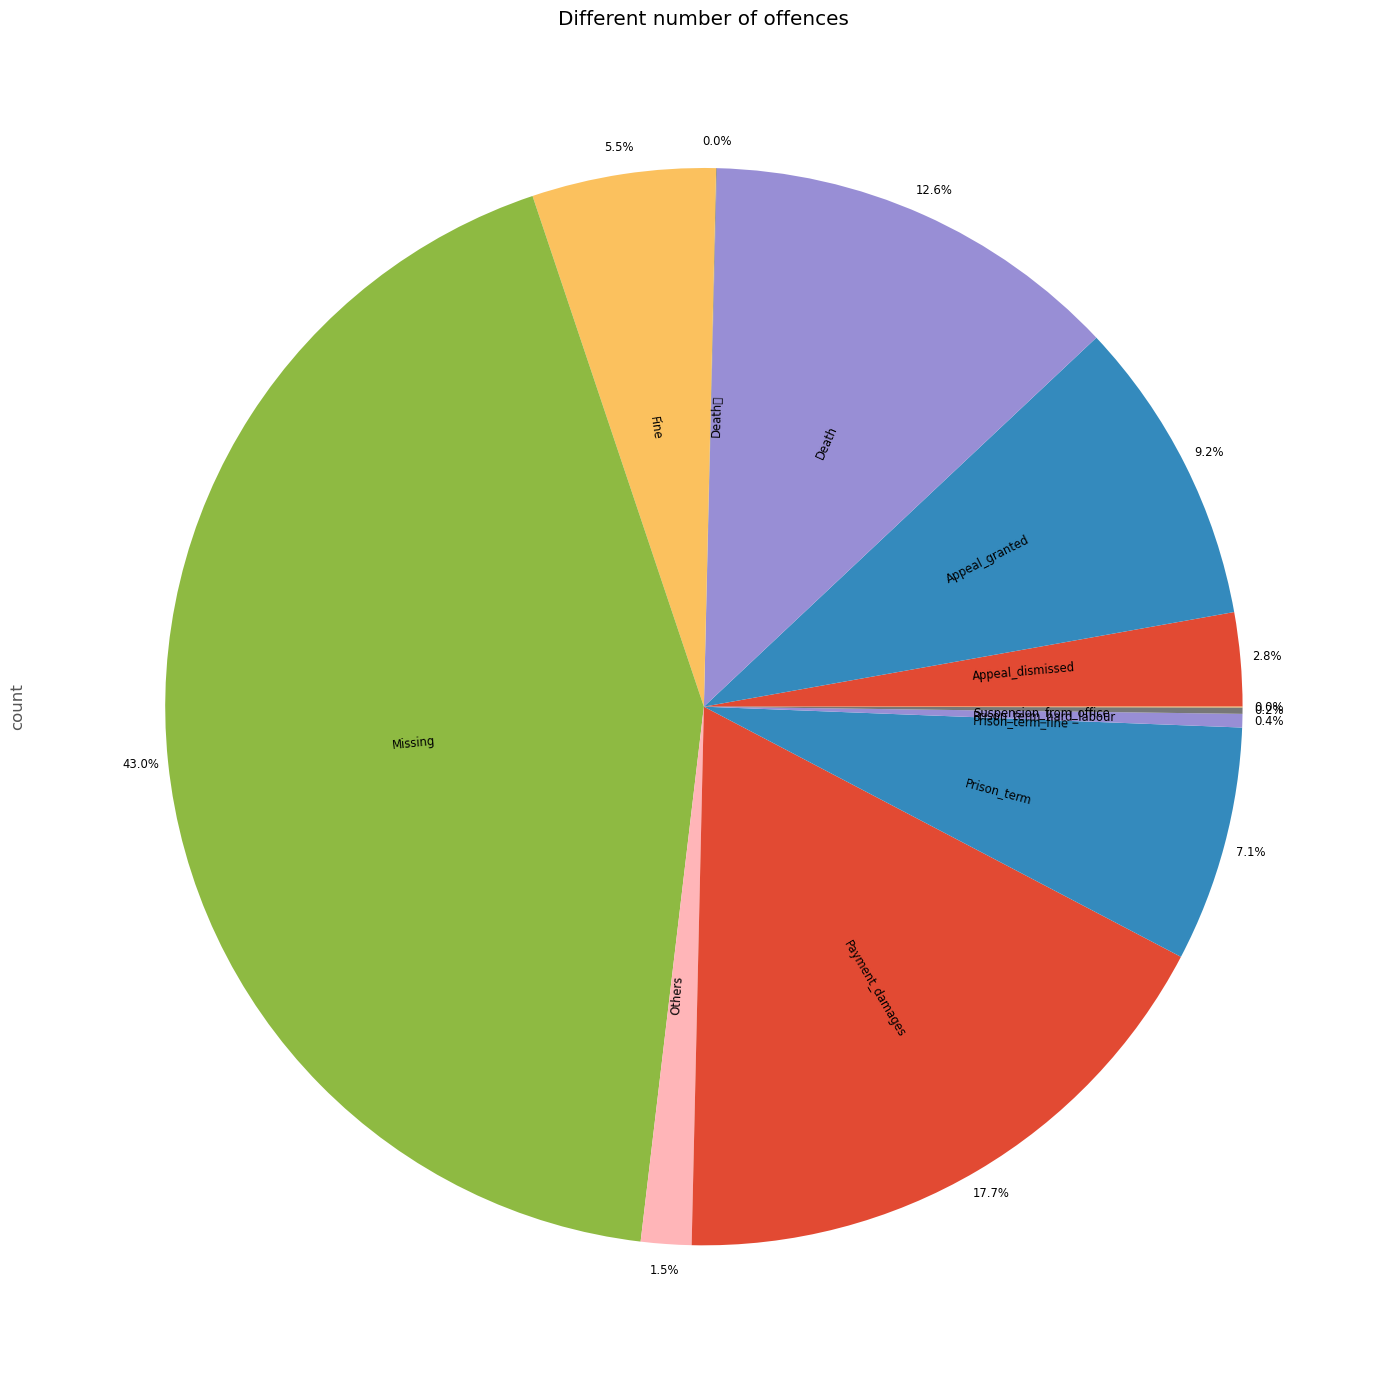

In [ ]:
plt.style.use('ggplot')
plot = df['sentence'].value_counts().sort_index().plot.pie(textprops={'size': 'small'},autopct='%1.1f%%',pctdistance=1.05,rotatelabels = 290,labeldistance=.5);
plt.title('Different number of offences')
fig = plt.gcf();
fig.set_size_inches(14,14);
save_fig("No_of_sentence_pie_plot")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appeal_district        4696 non-null   object
 1   trial_district         4696 non-null   object
 2   offence                4696 non-null   object
 3   sentence               4696 non-null   object
 4   no_complainant         4696 non-null   int64 
 5   no_male_complainant    4696 non-null   int64 
 6   no_female_complainant  4696 non-null   int64 
 7   no_appealant           4696 non-null   int64 
 8   no_male_appealant      4696 non-null   int64 
 9   no_female_appealant    4696 non-null   int64 
 10  no_public_witness      4696 non-null   int64 
 11  no_eye_witness         4696 non-null   int64 
 12  no_defense_witness     4696 non-null   int64 
 13  scn_decision           4696 non-null   object
dtypes: int64(9), object(5)
memory usage: 513.8+ KB


In [ ]:
df.dtypes

appeal_district          object
trial_district           object
offence                  object
sentence                 object
no_complainant            int64
no_male_complainant       int64
no_female_complainant     int64
no_appealant              int64
no_male_appealant         int64
no_female_appealant       int64
no_public_witness         int64
no_eye_witness            int64
no_defense_witness        int64
scn_decision             object
dtype: object

In [ ]:
df.describe()

no_complainant  no_male_complainant  no_female_complainant  \
count     4696.000000          4696.000000            4696.000000   
mean         0.123722            -0.589864              -0.703152   
std          1.676824             0.734380               0.527052   
min         -1.000000            -1.000000              -1.000000   
25%         -1.000000            -1.000000              -1.000000   
50%          0.000000            -1.000000              -1.000000   
75%          1.000000             0.000000               0.000000   
max         41.000000             5.000000               4.000000   

       no_appealant  no_male_appealant  no_female_appealant  \
count   4696.000000        4696.000000          4696.000000   
mean       0.894591          -0.058135            -0.629046   
std        1.995032           1.266184             0.542506   
min       -1.000000          -1.000000            -1.000000   
25%        0.000000          -1.000000            -1.000000   
50%        1.000000          -1.000000            -1.000000   
75%        1.000000           1.000000             0.000000   
max       46.000000          10.000000             3.000000   

       no_public_witness  no_eye_witness  no_defense_witness  
count        4696.000000     4696.000000         4696.000000  
mean            0.090503       -0.276831           -0.262564  
std             1.796253        0.832272            0.913426  
min            -1.000000       -1.000000           -1.000000  
25%            -1.000000       -1.000000           -1.000000  
50%             0.000000        0.000000            0.000000  
75%             0.000000        0.000000            0.000000  
max            22.000000       14.000000           23.000000

In [ ]:
df.isnull().sum()

appeal_district          0
trial_district           0
offence                  0
sentence                 0
no_complainant           0
no_male_complainant      0
no_female_complainant    0
no_appealant             0
no_male_appealant        0
no_female_appealant      0
no_public_witness        0
no_eye_witness           0
no_defense_witness       0
scn_decision             0
dtype: int64

In [ ]:
# Remove rows with missing values
df = df.dropna()

In [ ]:
df.shape

(4696, 14)

In [ ]:
# Unique Values
df.nunique()

appeal_district           8
trial_district            8
offence                  22
sentence                 12
no_complainant           20
no_male_complainant       7
no_female_complainant     6
no_appealant             22
no_male_appealant        12
no_female_appealant       5
no_public_witness        20
no_eye_witness           13
no_defense_witness       13
scn_decision              2
dtype: int64

In [ ]:
# See all unique entries of different columns
[df[appeal_district].unique() for appeal_district in df.columns]

[array(['North-West', 'South-East', 'South-South', 'Missing', 'South-West',
        'FCT', 'North-Central', 'North-East'], dtype=object),
 array(['North-West', 'South-East', 'South-South', 'Missing', 'South-West',
        'North-Central', 'North-East', 'FCT'], dtype=object),
 array(['Rape_sexual_abuse', 'Armed_robbery', 'Damage_property',
        'Murder_manslaughter', 'Missing', 'Fraud_impersonation',
        'Unlawful_possession', 'Human_rights_violation', 'Trespassing',
        'Unlawful_termination_appointment', 'Others', 'Law_of_tort',
        'Libel', 'Court_order_violation', 'Dispute', 'Election_petition',
        'Conspiracy', 'Theft', 'Curroption_abuse_office',
        'Claim_for_recovery', 'Civil_petition', 'Wrongful_accusations'],
       dtype=object),
 array(['Prison_term', 'Death', 'Prison_term_fine', 'Payment_damages',
        'Missing', 'Fine', 'Appeal_granted', 'Appeal_dismissed', 'Others',
        'Prison_term_hard_labour', 'Death\r', 'Suspension_from_office'],
       

In [ ]:
# See the location of certain value
np.where(df["sentence"] == 'Death\r')

(array([1678], dtype=int64),)

In [ ]:
#Replace with a value
df.loc[df['sentence'] == 'Death\r',  'sentence',] = 'Death'

In [ ]:
# Check it replaced or not
[df[appeal_district].unique() for appeal_district in df.columns]

[array(['North-West', 'South-East', 'South-South', 'Missing', 'South-West',
        'FCT', 'North-Central', 'North-East'], dtype=object),
 array(['North-West', 'South-East', 'South-South', 'Missing', 'South-West',
        'North-Central', 'North-East', 'FCT'], dtype=object),
 array(['Rape_sexual_abuse', 'Armed_robbery', 'Damage_property',
        'Murder_manslaughter', 'Missing', 'Fraud_impersonation',
        'Unlawful_possession', 'Human_rights_violation', 'Trespassing',
        'Unlawful_termination_appointment', 'Others', 'Law_of_tort',
        'Libel', 'Court_order_violation', 'Dispute', 'Election_petition',
        'Conspiracy', 'Theft', 'Curroption_abuse_office',
        'Claim_for_recovery', 'Civil_petition', 'Wrongful_accusations'],
       dtype=object),
 array(['Prison_term', 'Death', 'Prison_term_fine', 'Payment_damages',
        'Missing', 'Fine', 'Appeal_granted', 'Appeal_dismissed', 'Others',
        'Prison_term_hard_labour', 'Suspension_from_office'], dtype=object),
 ar

In [ ]:
# See this types of things exists
np.where(df["sentence"] == 'Death\r')

(array([], dtype=int64),)

In [ ]:
df.columns

Index(['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness',
       'scn_decision'],
      dtype='object')

In [ ]:
print('Number of columns before feature selection = ',len(df.columns))

Number of columns before feature selection =  14


In [ ]:
#Select feature which has more than 1 unique values
selected_features = []
for cols in df.columns:
    if len(df[cols].unique()) > 1:
        selected_features.append(cols)
selected_features

['appeal_district',
 'trial_district',
 'offence',
 'sentence',
 'no_complainant',
 'no_male_complainant',
 'no_female_complainant',
 'no_appealant',
 'no_male_appealant',
 'no_female_appealant',
 'no_public_witness',
 'no_eye_witness',
 'no_defense_witness',
 'scn_decision']

In [ ]:
print('Number of columns after feature selection = ',len(selected_features))

Number of columns after feature selection =  14


In [ ]:
# Transform appeal_district and trial_district  column values from catagorical to numerical values


from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()


# Fit the encoder and transform the data
encoded_data = le.fit_transform(['North-Central','North-East','North-West','South-South','South-East',
                                 'South-West','FCT','Missing'])-1


# Print the encoded data
print('Printed Value: ',encoded_data)

#Transform values
df['appeal_district'] =le.transform(df['appeal_district'])

df['trial_district'] =le.transform(df['trial_district'])


# Making  dataframe value according to printed value
df['appeal_district']= df['appeal_district'] -1
df['trial_district']= df['trial_district'] -1



# Making missing value to -1 and FCT value to 7

df.loc[df['appeal_district'] == -1, 'appeal_district',] = 7
df.loc[df['appeal_district'] == 0, 'appeal_district',] = -1



df.loc[df['trial_district'] == -1, 'trial_district',] = 7
df.loc[df['trial_district'] == 0,  'trial_district',] = -1


Printed Value:  [ 1  2  3  5  4  6 -1  0]


In [ ]:
df.head()

appeal_district  trial_district              offence          sentence  \
0                3               3    Rape_sexual_abuse       Prison_term   
1                4               4        Armed_robbery             Death   
2                5               5      Damage_property  Prison_term_fine   
3                5               5  Murder_manslaughter             Death   
4                4              -1              Missing   Payment_damages   

   no_complainant  no_male_complainant  no_female_complainant  no_appealant  \
0               1                    0                      1             1   
1               1                    1                      0             1   
2               1                    1                      0            10   
3               2                    0                      2             1   
4               1                    1                      0             2   

   no_male_appealant  no_female_appealant  no_public_witness  no_eye_witness  \
0                  1                    0                  4               1   
1                  1                    0                  2               1   
2                 10                    0                  4               0   
3                  1                    0                  2               0   
4                  1                    0                 -1               0   

   no_defense_witness scn_decision  
0                   0    Dismissed  
1                   0    Dismissed  
2                   0    Dismissed  
3                   0    Dismissed  
4                   0    Dismissed

In [ ]:
# Transform Offence column values from catagorical to numerical values

from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()


# Fit the encoder and transform the data
encoded_data = le.fit_transform(['Wrongful_accusations','Dispute','Court_order_violation','Curroption_abuse_office','Murder_manslaughter',
'Libel','Unlawful_possession','Trespassing','Civil_petition','Theft','Unlawful_termination_appointment',
'Armed_robbery','Human_rights_violation', 'Rape_sexual_abuse','Law_of_tort','Election_petition','Conspiracy',
'Claim_for_recovery','Fraud_impersonation','Damage_property','Others','Missing'])


# Print the encoded data
print('Printed Value: ',encoded_data)

#Transform values
df['offence'] =le.transform(df['offence'])

# Assign 'Missing' as -1 and last value (21) in place of 'Missing' (13)

df.loc[df['offence'] == 13, 'offence',] = -1
df.loc[df['offence'] == 21, 'offence',] = 13


Printed Value:  [21  7  4  5 14 12 19 18  1 17 20  0 10 16 11  8  3  2  9  6 15 13]


In [ ]:
df.head()

appeal_district  trial_district  offence          sentence  no_complainant  \
0                3               3       16       Prison_term               1   
1                4               4        0             Death               1   
2                5               5        6  Prison_term_fine               1   
3                5               5       14             Death               2   
4                4              -1       -1   Payment_damages               1   

   no_male_complainant  no_female_complainant  no_appealant  \
0                    0                      1             1   
1                    1                      0             1   
2                    1                      0            10   
3                    0                      2             1   
4                    1                      0             2   

   no_male_appealant  no_female_appealant  no_public_witness  no_eye_witness  \
0                  1                    0                  4               1   
1                  1                    0                  2               1   
2                 10                    0                  4               0   
3                  1                    0                  2               0   
4                  1                    0                 -1               0   

   no_defense_witness scn_decision  
0                   0    Dismissed  
1                   0    Dismissed  
2                   0    Dismissed  
3                   0    Dismissed  
4                   0    Dismissed

In [ ]:
# Transform sentence column values from catagorical to numerical values

from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()


# Fit the encoder and transform the data
encoded_data = le.fit_transform(['Fine','Prison_term','Prison_term_fine','Prison_term_hard_labour','Suspension_from_office','Death',
'Payment_damages','Appeal_granted','Appeal_dismissed','Others','Missing'] )


# Print the encoded data
print('Printed Value: ',encoded_data)

#Transform values
df['sentence'] =le.transform(df['sentence'])


# Assign 'Missing' as -1 and last value (10) in place of 'Missing' (4)

df.loc[df['sentence'] == 4,  'sentence',] = -1
df.loc[df['sentence'] == 10, 'sentence',] =  4



Printed Value:  [ 3  7  8  9 10  2  6  1  0  5  4]


In [ ]:
df.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
0                3               3       16         7               1   
1                4               4        0         2               1   
2                5               5        6         8               1   
3                5               5       14         2               2   
4                4              -1       -1         6               1   

   no_male_complainant  no_female_complainant  no_appealant  \
0                    0                      1             1   
1                    1                      0             1   
2                    1                      0            10   
3                    0                      2             1   
4                    1                      0             2   

   no_male_appealant  no_female_appealant  no_public_witness  no_eye_witness  \
0                  1                    0                  4               1   
1                  1                    0                  2               1   
2                 10                    0                  4               0   
3                  1                    0                  2               0   
4                  1                    0                 -1               0   

   no_defense_witness scn_decision  
0                   0    Dismissed  
1                   0    Dismissed  
2                   0    Dismissed  
3                   0    Dismissed  
4                   0    Dismissed

In [ ]:
# Transform scn_decision column values from catagorical to numerical values

from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()


# Fit the encoder and transform the data
encoded_data = le.fit_transform(['Dismissed', 'Granted'] )


# Print the encoded data
print('Printed Value: ',encoded_data)

#Transform values
df['scn_decision'] =le.transform(df['scn_decision'])

Printed Value:  [0 1]


In [ ]:
df.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
0                3               3       16         7               1   
1                4               4        0         2               1   
2                5               5        6         8               1   
3                5               5       14         2               2   
4                4              -1       -1         6               1   

   no_male_complainant  no_female_complainant  no_appealant  \
0                    0                      1             1   
1                    1                      0             1   
2                    1                      0            10   
3                    0                      2             1   
4                    1                      0             2   

   no_male_appealant  no_female_appealant  no_public_witness  no_eye_witness  \
0                  1                    0                  4               1   
1                  1                    0                  2               1   
2                 10                    0                  4               0   
3                  1                    0                  2               0   
4                  1                    0                 -1               0   

   no_defense_witness  scn_decision  
0                   0             0  
1                   0             0  
2                   0             0  
3                   0             0  
4                   0             0

In [ ]:
stratified_sample = df.groupby('offence').apply(
    lambda x: x.sample(frac=0.20)
)

stratified_sample.head()

stratified_sample = stratified_sample.droplevel(0)
stratified_sample.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
4082               -1              -1       -1        -1              -1   
3624                6               6       -1        -1               1   
3683                6               6       -1        -1              -1   
3419               -1              -1       -1        -1              -1   
3903                3               3       -1        -1               1   

      no_male_complainant  no_female_complainant  no_appealant  \
4082                   -1                     -1            -1   
3624                   -1                     -1             1   
3683                   -1                     -1             1   
3419                   -1                     -1            -1   
3903                    1                      0             1   

      no_male_appealant  no_female_appealant  no_public_witness  \
4082                 -1                   -1                  0   
3624                 -1                   -1                  0   
3683                 -1                   -1                  0   
3419                 -1                   -1                 -1   
3903                  1                    0                  0   

      no_eye_witness  no_defense_witness  scn_decision  
4082               0                   0             0  
3624               0                   0             0  
3683               0                   0             0  
3419              -1                  -1             1  
3903               0                   0             0

In [ ]:
# Replace values of df with stratified_sample
df = stratified_sample

In [ ]:
X = df.drop(columns = 'scn_decision')
y = df['scn_decision']

In [ ]:
X.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
4082               -1              -1       -1        -1              -1   
3624                6               6       -1        -1               1   
3683                6               6       -1        -1              -1   
3419               -1              -1       -1        -1              -1   
3903                3               3       -1        -1               1   

      no_male_complainant  no_female_complainant  no_appealant  \
4082                   -1                     -1            -1   
3624                   -1                     -1             1   
3683                   -1                     -1             1   
3419                   -1                     -1            -1   
3903                    1                      0             1   

      no_male_appealant  no_female_appealant  no_public_witness  \
4082                 -1                   -1                  0   
3624                 -1                   -1                  0   
3683                 -1                   -1                  0   
3419                 -1                   -1                 -1   
3903                  1                    0                  0   

      no_eye_witness  no_defense_witness  
4082               0                   0  
3624               0                   0  
3683               0                   0  
3419              -1                  -1  
3903               0                   0

In [ ]:
y.head()

4082    0
3624    0
3683    0
3419    1
3903    0
Name: scn_decision, dtype: int32

In [ ]:
corr = df.corr()
corr

appeal_district  trial_district   offence  sentence  \
appeal_district               1.000000        0.190514 -0.116612 -0.026031   
trial_district                0.190514        1.000000 -0.050426  0.088822   
offence                      -0.116612       -0.050426  1.000000  0.129528   
sentence                     -0.026031        0.088822  0.129528  1.000000   
no_complainant               -0.003521       -0.033864 -0.032852 -0.121831   
no_male_complainant          -0.034485       -0.004126 -0.109398  0.096995   
no_female_complainant        -0.043478        0.009175 -0.094040  0.147468   
no_appealant                  0.019811        0.025853  0.015637 -0.005806   
no_male_appealant            -0.052272        0.004100 -0.011804  0.180064   
no_female_appealant          -0.041095        0.056574 -0.020267  0.235728   
no_public_witness            -0.007475        0.083424  0.031951  0.160445   
no_eye_witness               -0.078782        0.025395  0.010234  0.187168   
no_defense_witness           -0.016500        0.025497  0.009054  0.157857   
scn_decision                 -0.119895        0.016448  0.027463 -0.033050   

                       no_complainant  no_male_complainant  \
appeal_district             -0.003521            -0.034485   
trial_district              -0.033864            -0.004126   
offence                     -0.032852            -0.109398   
sentence                    -0.121831             0.096995   
no_complainant               1.000000             0.211441   
no_male_complainant          0.211441             1.000000   
no_female_complainant        0.121228             0.626106   
no_appealant                 0.149433             0.111129   
no_male_appealant           -0.049752             0.392420   
no_female_appealant         -0.031690             0.413702   
no_public_witness           -0.056666             0.093233   
no_eye_witness              -0.072385             0.193281   
no_defense_witness          -0.081044             0.107947   
scn_decision                 0.048289             0.025595   

                       no_female_complainant  no_appealant  no_male_appealant  \
appeal_district                    -0.043478      0.019811          -0.052272   
trial_district                      0.009175      0.025853           0.004100   
offence                            -0.094040      0.015637          -0.011804   
sentence                            0.147468     -0.005806           0.180064   
no_complainant                      0.121228      0.149433          -0.049752   
no_male_complainant                 0.626106      0.111129           0.392420   
no_female_complainant               1.000000      0.097289           0.417966   
no_appealant                        0.097289      1.000000           0.367938   
no_male_appealant                   0.417966      0.367938           1.000000   
no_female_appealant                 0.526501      0.172163           0.592816   
no_public_witness                   0.182387      0.069931           0.201784   
no_eye_witness                      0.199571     -0.001712           0.175750   
no_defense_witness                  0.149345      0.029760           0.203917   
scn_decision                       -0.000687     -0.027030          -0.034467   

                       no_female_appealant  no_public_witness  no_eye_witness  \
appeal_district                  -0.041095          -0.007475       -0.078782   
trial_district                    0.056574           0.083424        0.025395   
offence                          -0.020267           0.031951        0.010234   
sentence                          0.235728           0.160445        0.187168   
no_complainant                   -0.031690          -0.056666       -0.072385   
no_male_complainant               0.413702           0.093233        0.193281   
no_female_complainant             0.526501           0.182387        0.199571   
no_appealant                      0.172163           0.06

In [ ]:
corr["appeal_district"]

appeal_district          1.000000
trial_district           0.190514
offence                 -0.116612
sentence                -0.026031
no_complainant          -0.003521
no_male_complainant     -0.034485
no_female_complainant   -0.043478
no_appealant             0.019811
no_male_appealant       -0.052272
no_female_appealant     -0.041095
no_public_witness       -0.007475
no_eye_witness          -0.078782
no_defense_witness      -0.016500
scn_decision            -0.119895
Name: appeal_district, dtype: float64

In [ ]:
corr["trial_district"]

appeal_district          0.190514
trial_district           1.000000
offence                 -0.050426
sentence                 0.088822
no_complainant          -0.033864
no_male_complainant     -0.004126
no_female_complainant    0.009175
no_appealant             0.025853
no_male_appealant        0.004100
no_female_appealant      0.056574
no_public_witness        0.083424
no_eye_witness           0.025395
no_defense_witness       0.025497
scn_decision             0.016448
Name: trial_district, dtype: float64

In [ ]:
corr["appeal_district"].sort_values(ascending=False)

appeal_district          1.000000
trial_district           0.190514
no_appealant             0.019811
no_complainant          -0.003521
no_public_witness       -0.007475
no_defense_witness      -0.016500
sentence                -0.026031
no_male_complainant     -0.034485
no_female_appealant     -0.041095
no_female_complainant   -0.043478
no_male_appealant       -0.052272
no_eye_witness          -0.078782
offence                 -0.116612
scn_decision            -0.119895
Name: appeal_district, dtype: float64

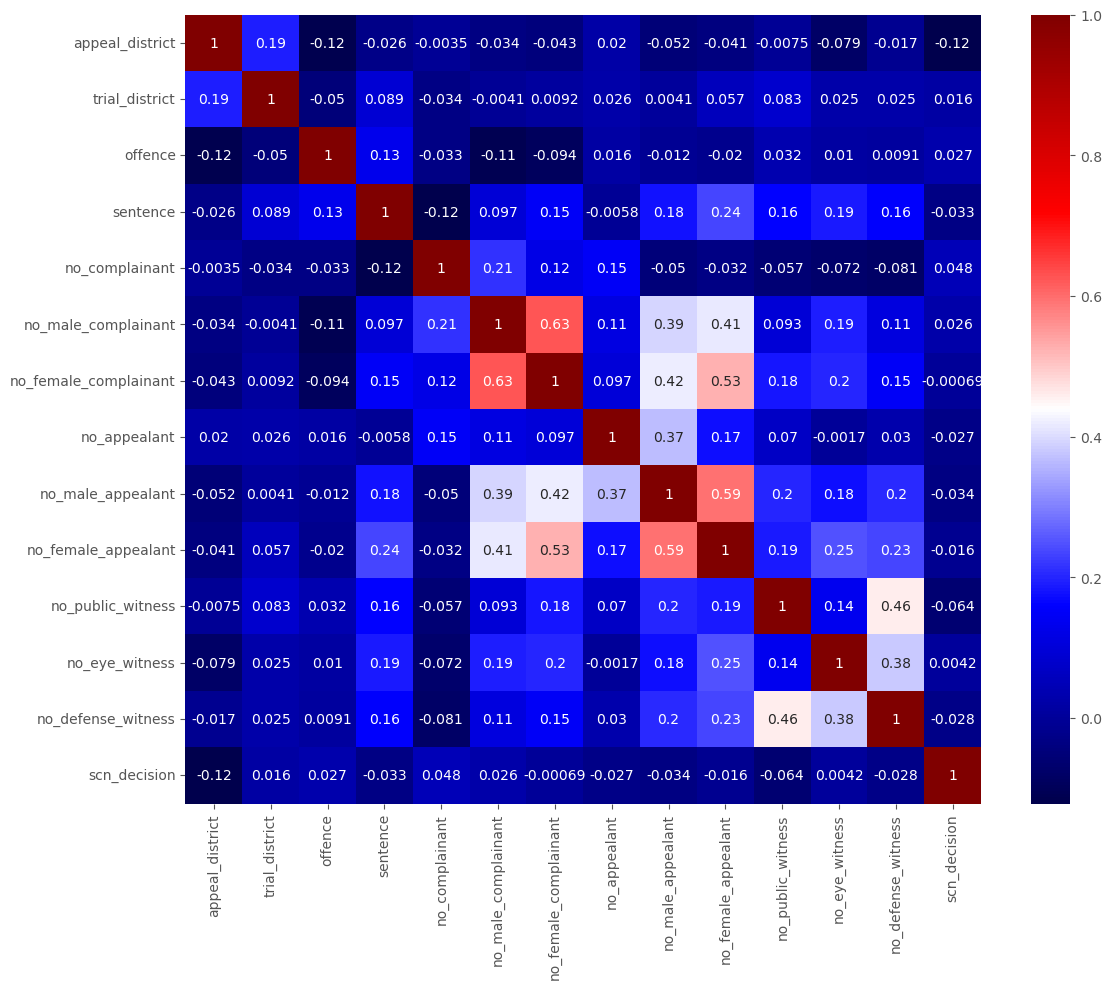

In [ ]:
# A good way to visualize correlation is using a heatmap
plt.style.use('ggplot')
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
save_fig("Feature_corelation_rc_heatmap_plot")
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

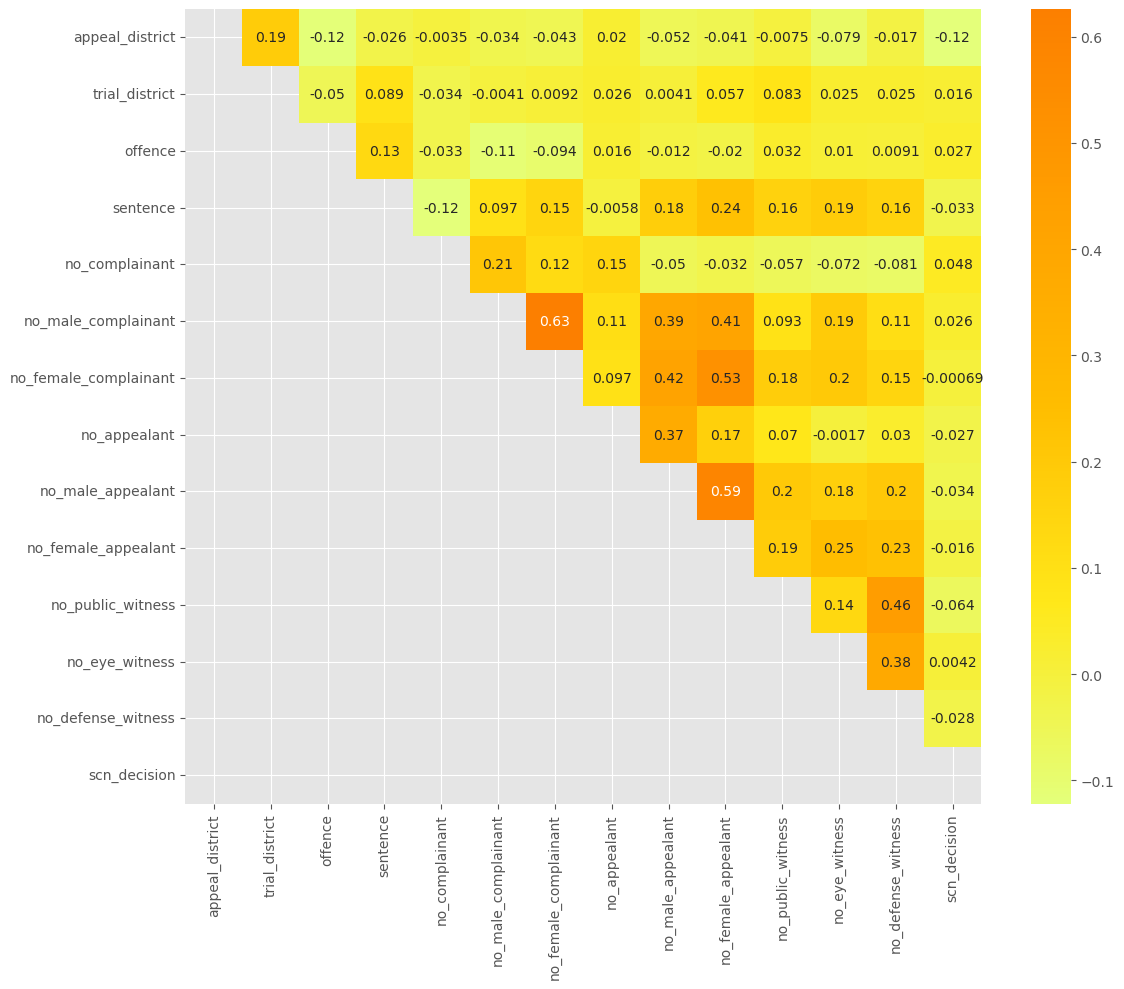

In [ ]:
plt.style.use('ggplot')
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap="Wistia", mask = mask2);
save_fig("Feature_corelation_tril_heatmap_plot")

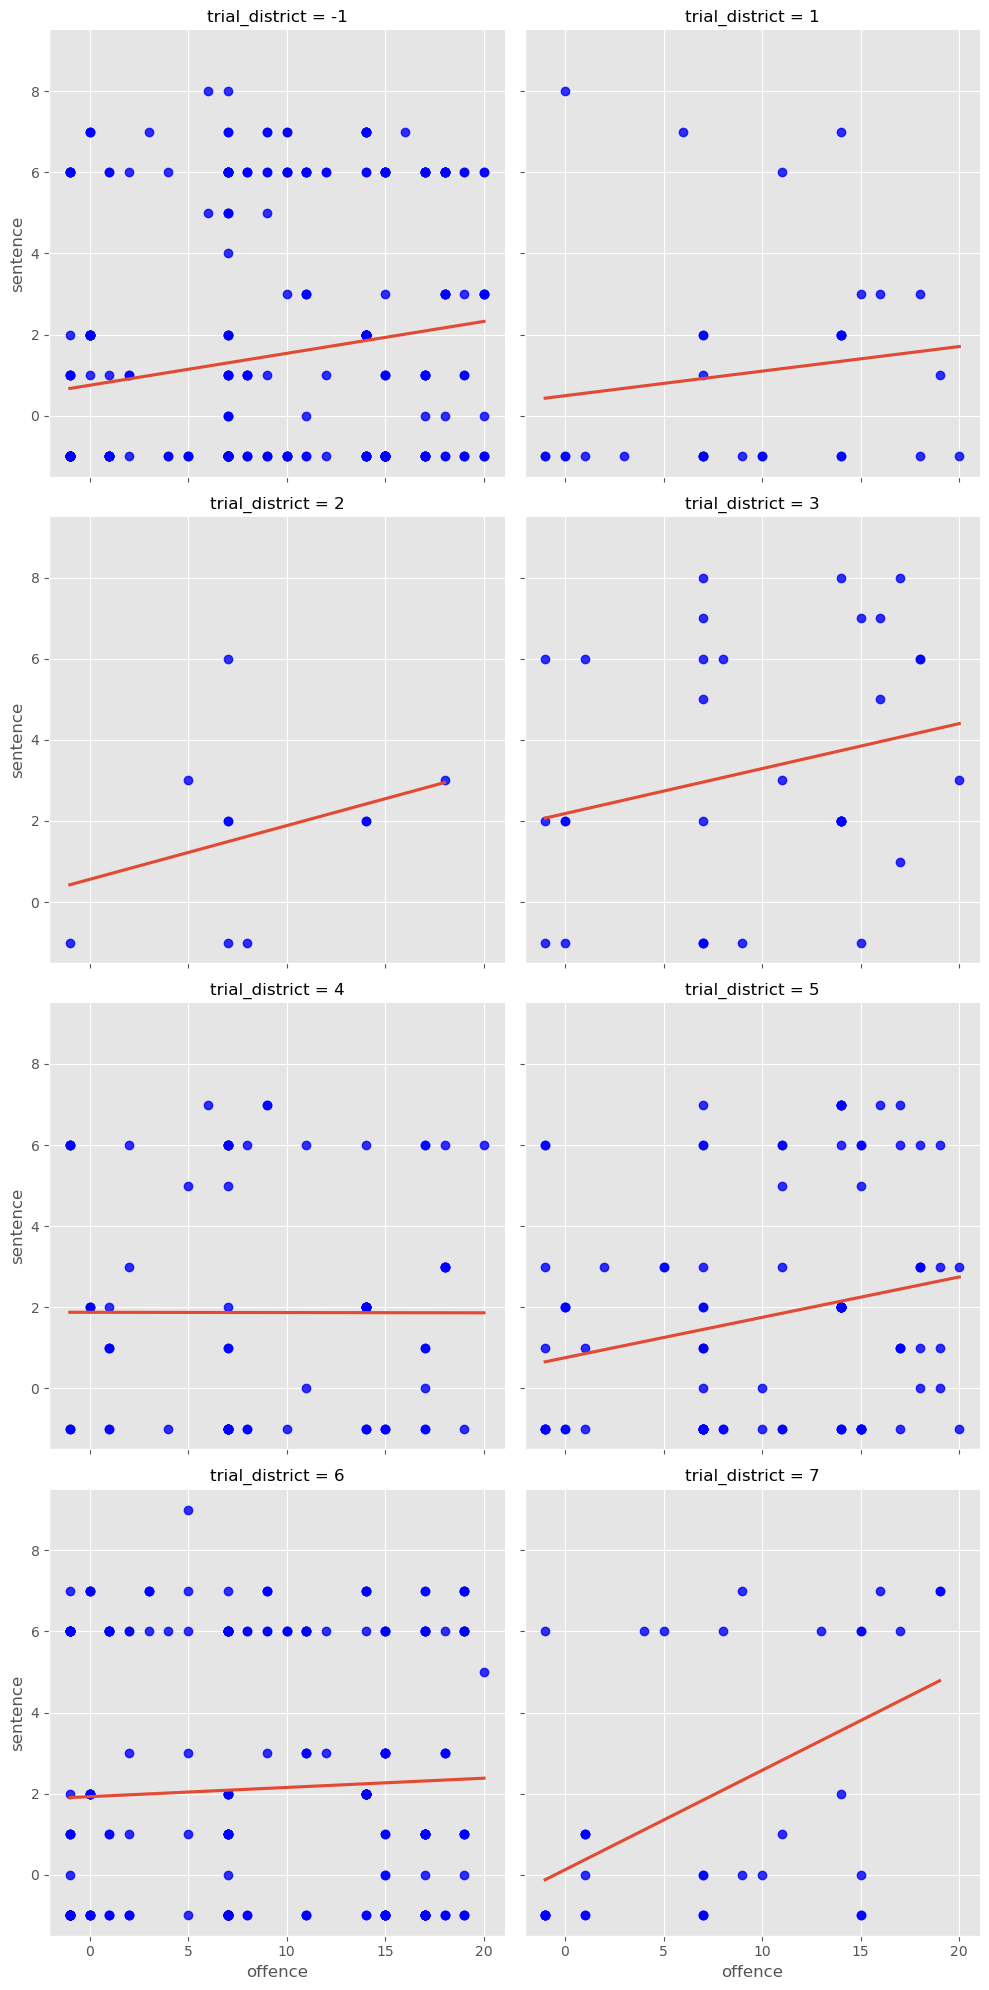

In [ ]:
# Visualising a Subset of my data - important features
g = sns.lmplot(x = 'offence', y = 'sentence', data = df, col = 'trial_district', col_wrap = 2, height = 5,
              scatter_kws = {'color':'blue'}, ci = False)

In [ ]:
feature = ['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness']

In [ ]:
list(enumerate(feature))

[(0, 'appeal_district'),
 (1, 'trial_district'),
 (2, 'offence'),
 (3, 'sentence'),
 (4, 'no_complainant'),
 (5, 'no_male_complainant'),
 (6, 'no_female_complainant'),
 (7, 'no_appealant'),
 (8, 'no_male_appealant'),
 (9, 'no_female_appealant'),
 (10, 'no_public_witness'),
 (11, 'no_eye_witness'),
 (12, 'no_defense_witness')]

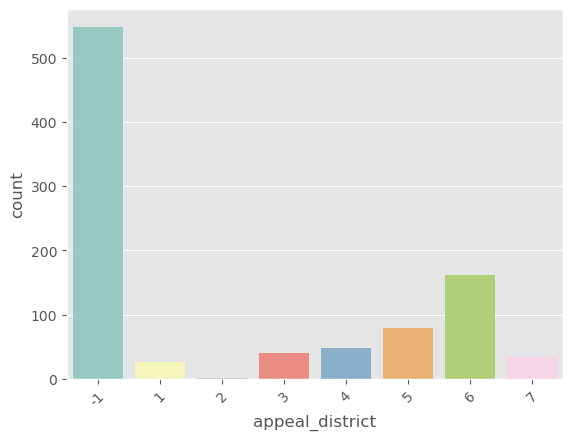

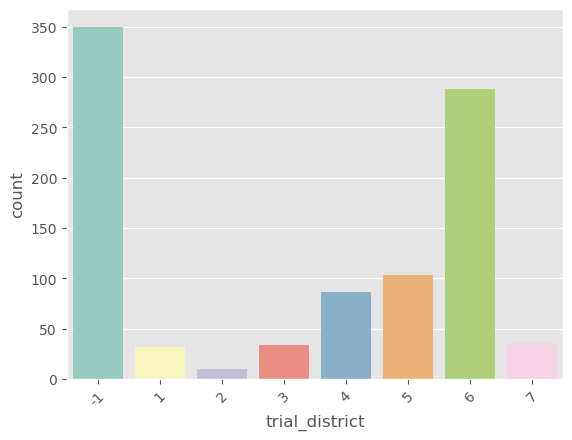

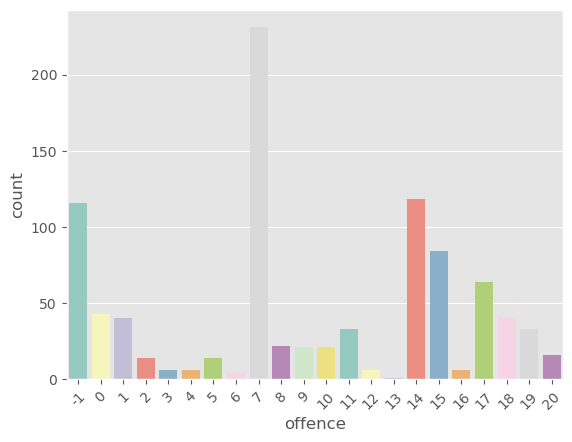

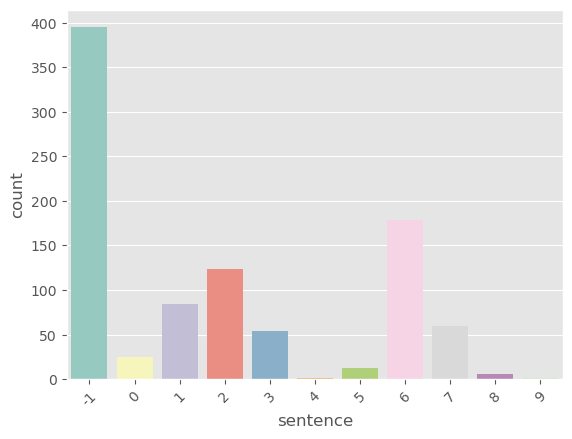

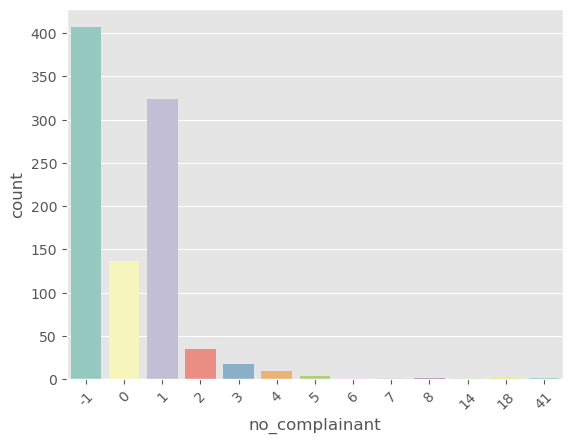

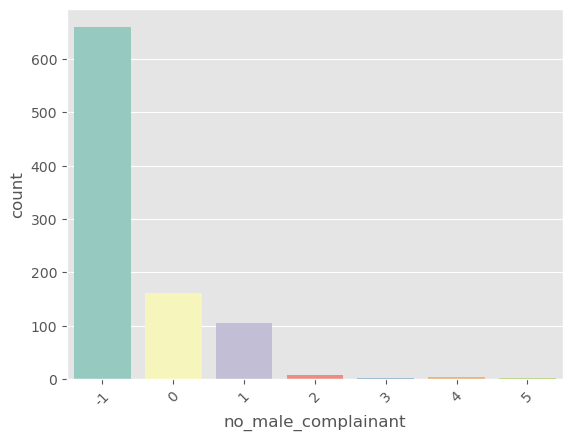

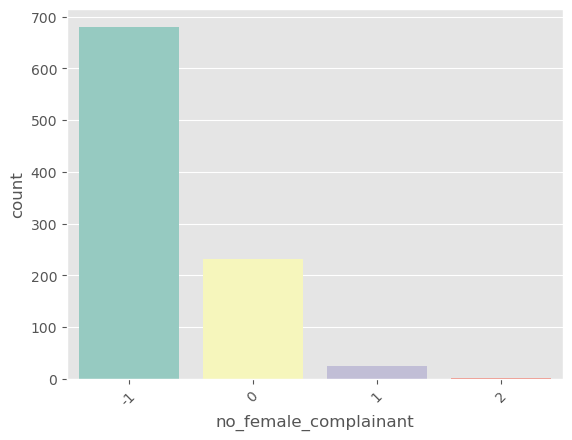

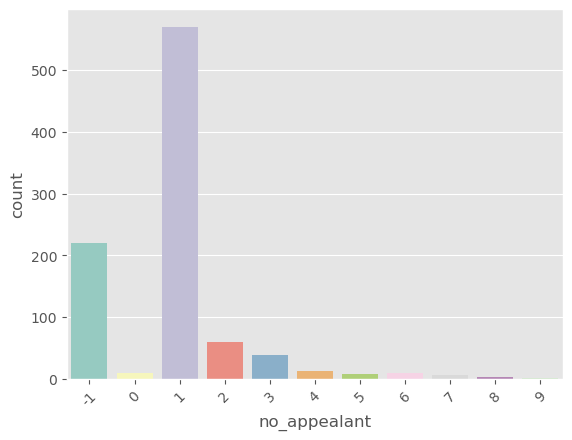

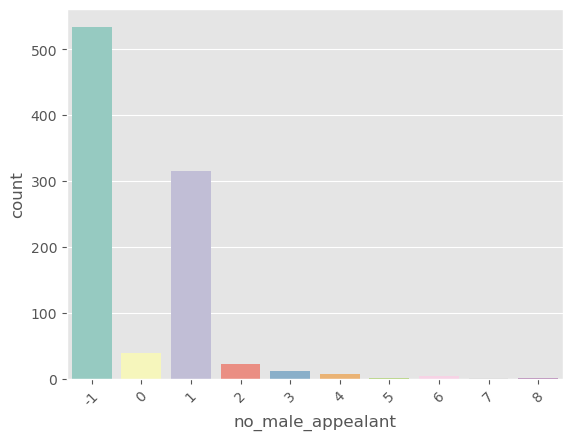

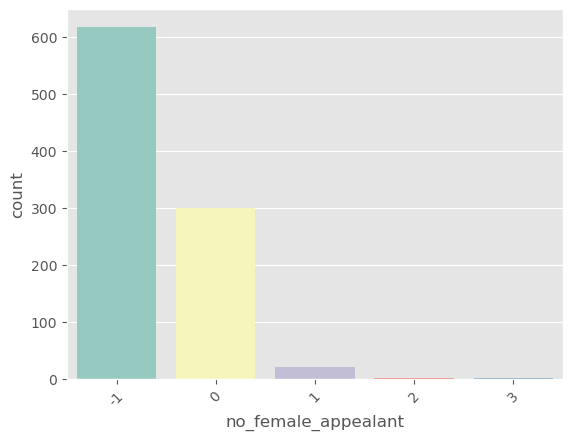

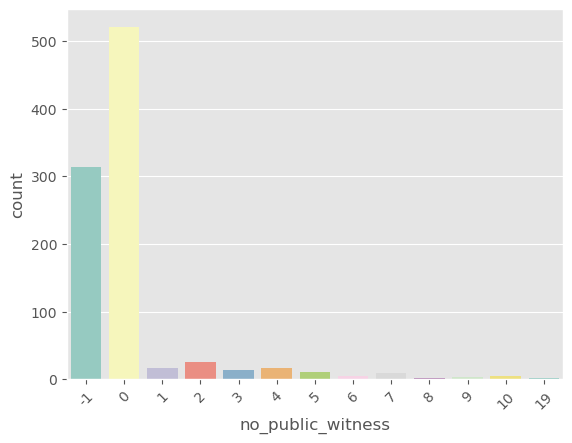

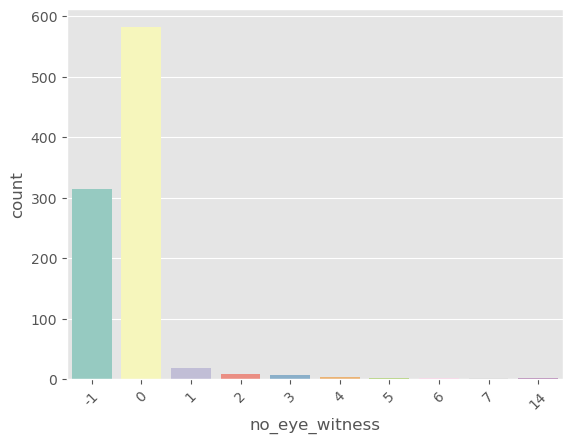

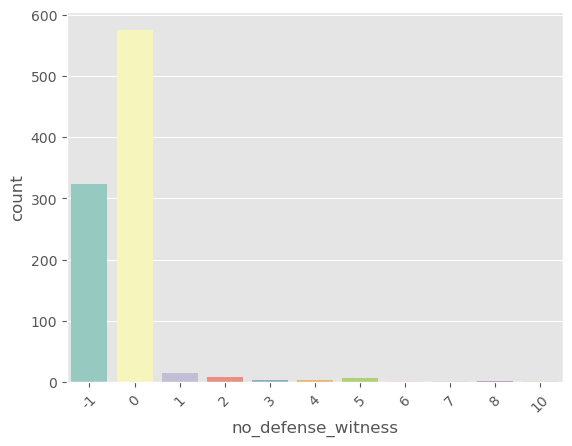

In [ ]:
#Looping through all the features by my y variable - see if there is relationship
plt.style.use('ggplot')
features = [ 'appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness']

for f in features:
    plt.style.use('ggplot')
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

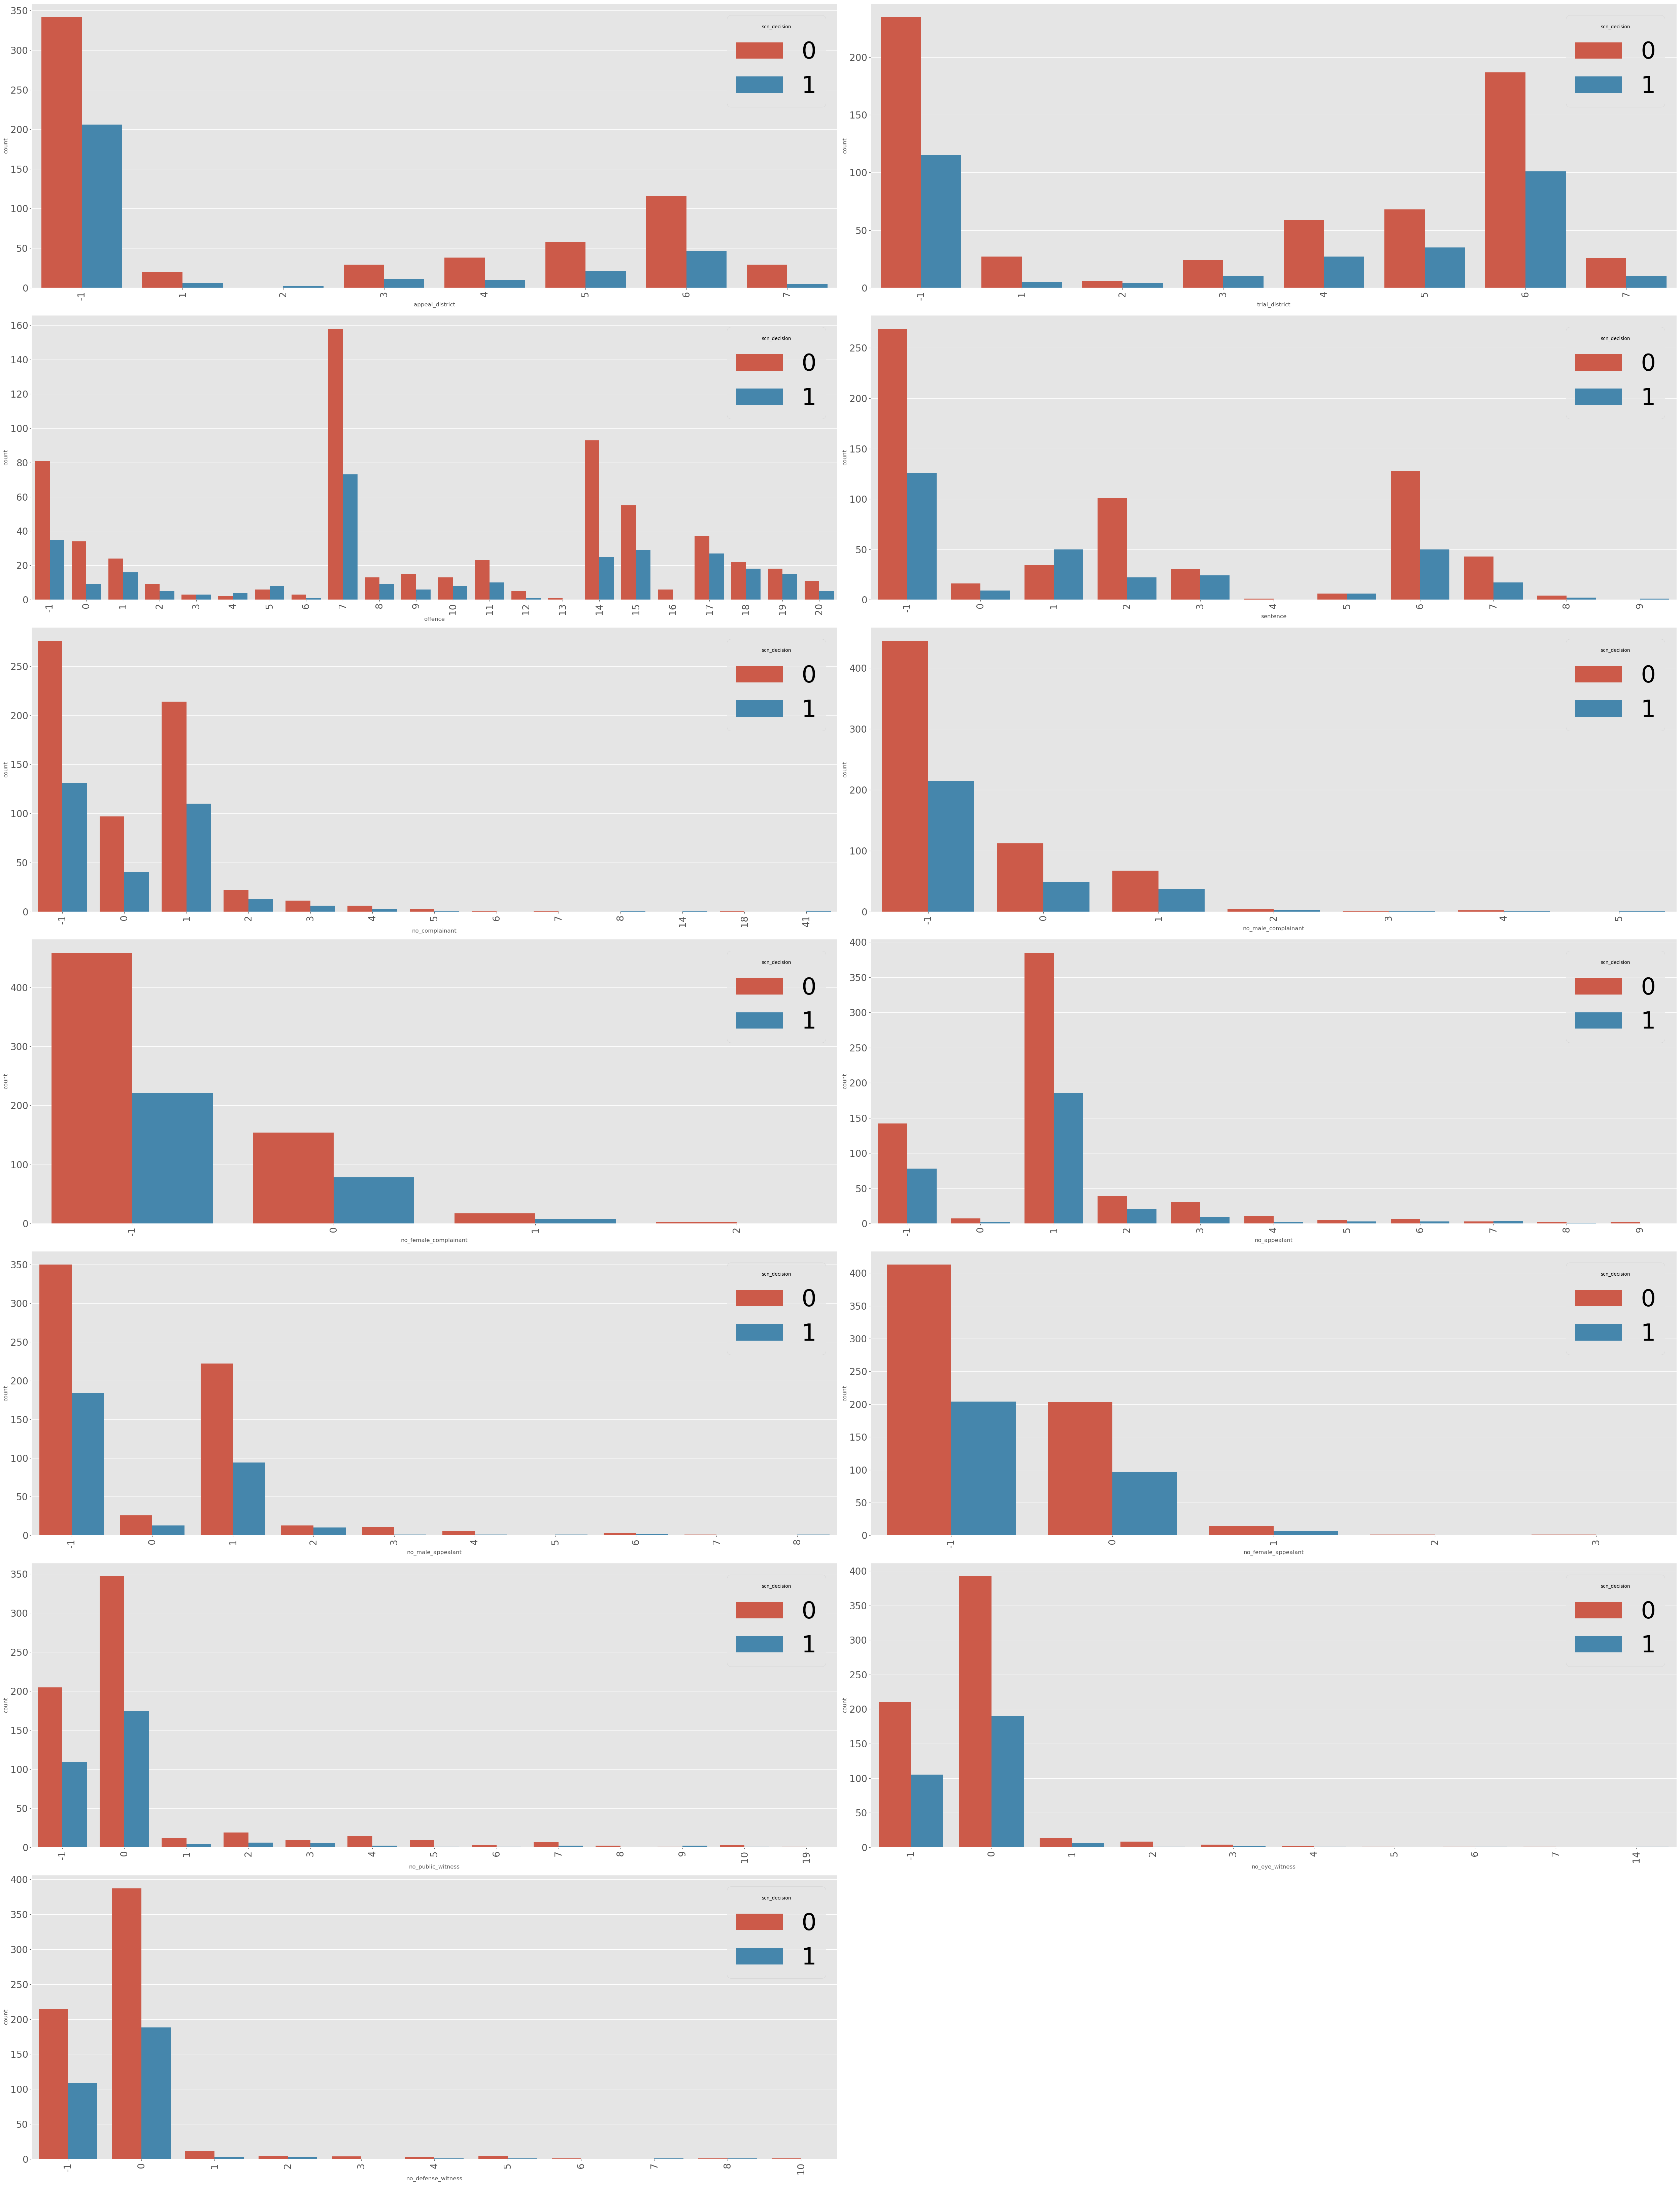

In [ ]:
plt.style.use('ggplot')
plt.rc('legend', fontsize=50)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize = (50, 65))
for i in enumerate(feature):
    plt.subplot(7, 2,i[0]+1)
    plt.subplots_adjust(wspace = 0.5)
    sns.countplot(x = i[1], hue = df['scn_decision'], data = df)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=2.0)
    save_fig('Count plot for for '+ str(i[1]))

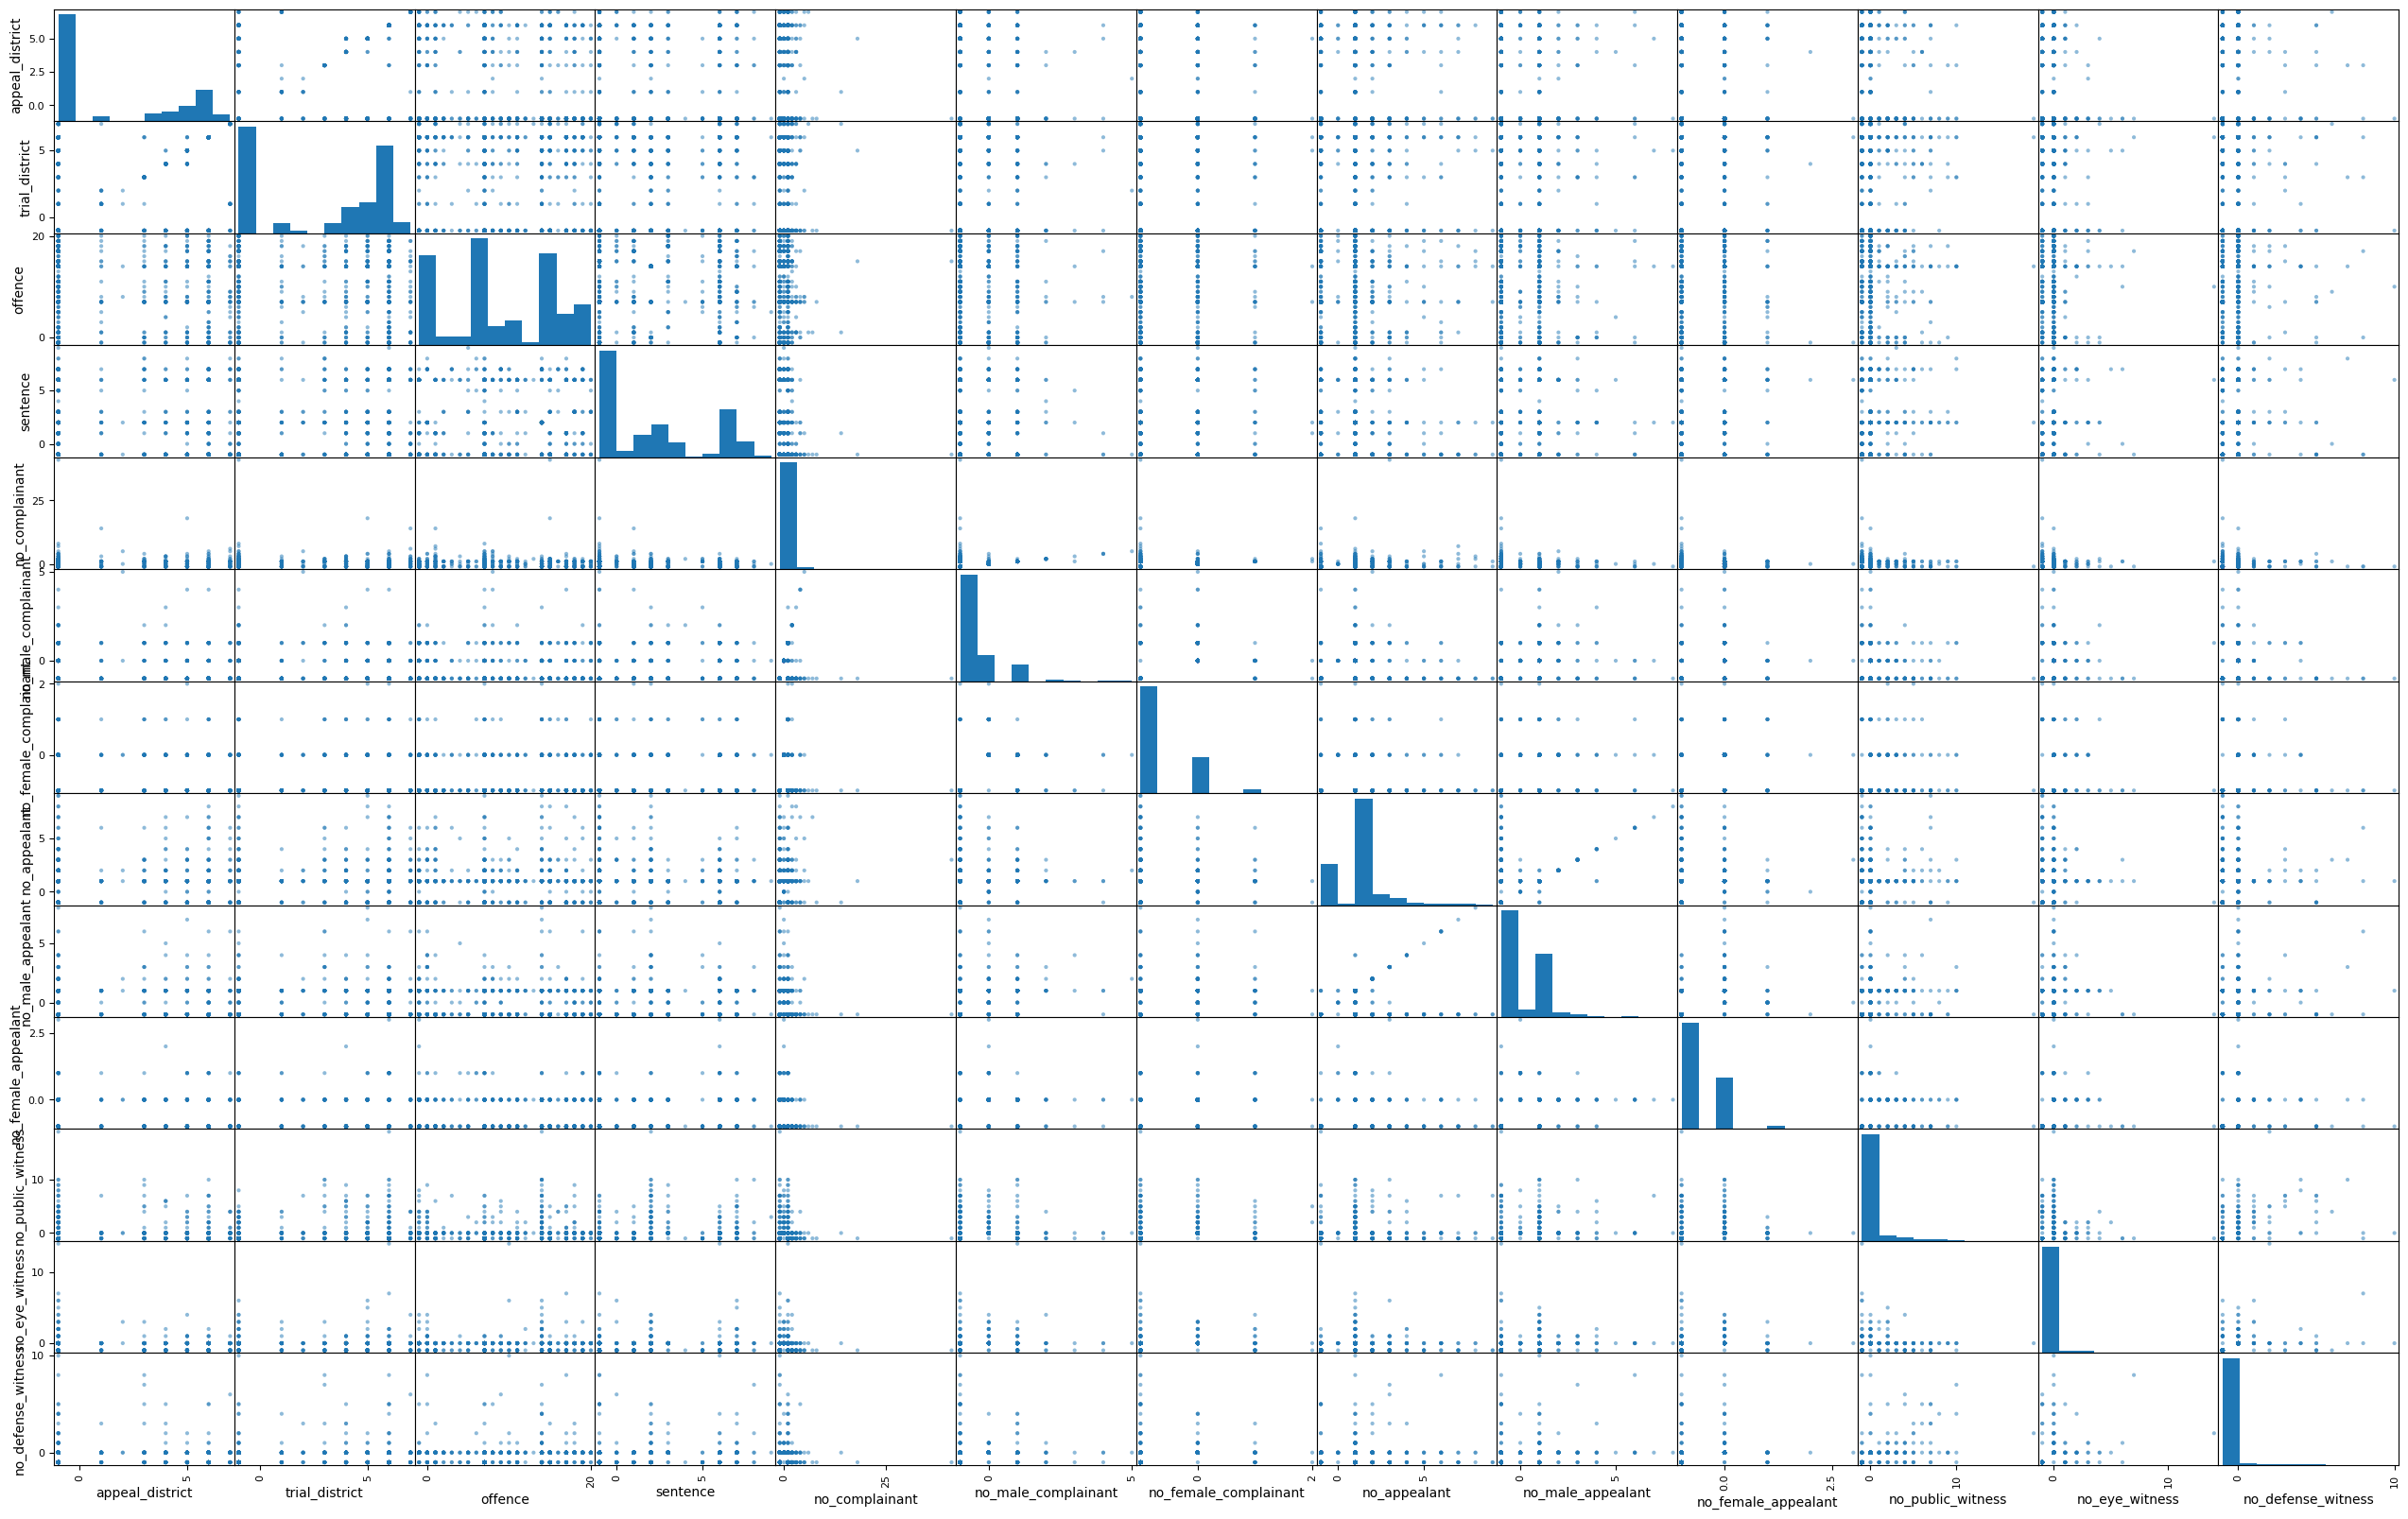

<Figure size 5000x6500 with 0 Axes>

In [ ]:
plt.style.use('default')
from pandas.plotting import scatter_matrix

attributes = ['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness']
scatter_matrix(df[attributes], figsize=(32, 20))
# extra code
plt.xticks(rotation = 90)
plt.rc('legend', fontsize=50)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize = (50, 65))
save_fig("scatter_matrix_plot")
plt.show()

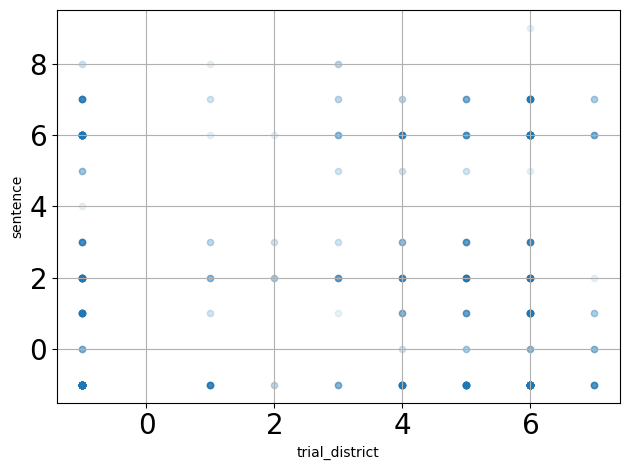

In [ ]:
df.plot(kind="scatter", x="trial_district", y="sentence",
             alpha=0.1, grid=True)
save_fig("Trail district vs sentence plot")  # extra code
plt.show()

In [ ]:
# Descrive a column
df['appeal_district'].describe()

count    939.000000
mean       1.489883
std        3.114492
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        5.000000
max        7.000000
Name: appeal_district, dtype: float64

In [ ]:
df.columns

Index(['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness',
       'scn_decision'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 60)

In [ ]:
X.columns

Index(['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness'],
      dtype='object')

In [ ]:
X_train.describe()

appeal_district  trial_district     offence    sentence  \
count       751.000000      751.000000  751.000000  751.000000   
mean          1.394141        2.856192    8.858855    1.850866   
std           3.093075        3.160690    6.554087    3.025954   
min          -1.000000       -1.000000   -1.000000   -1.000000   
25%          -1.000000       -1.000000    3.000000   -1.000000   
50%          -1.000000        4.000000    7.000000    1.000000   
75%           5.000000        6.000000   15.000000    6.000000   
max           7.000000        7.000000   20.000000    9.000000   

       no_complainant  no_male_complainant  no_female_complainant  \
count      751.000000           751.000000             751.000000   
mean         0.151798            -0.541944              -0.693742   
std          1.470916             0.813575               0.520974   
min         -1.000000            -1.000000              -1.000000   
25%         -1.000000            -1.000000              -1.000000   
50%          0.000000            -1.000000              -1.000000   
75%          1.000000             0.000000               0.000000   
max         18.000000             5.000000               2.000000   

       no_appealant  no_male_appealant  no_female_appealant  \
count    751.000000         751.000000           751.000000   
mean       0.888149          -0.027963            -0.623169   
std        1.511998           1.284997             0.549372   
min       -1.000000          -1.000000            -1.000000   
25%        1.000000          -1.000000            -1.000000   
50%        1.000000          -1.000000            -1.000000   
75%        1.000000           1.000000             0.000000   
max        9.000000           8.000000             3.000000   

       no_public_witness  no_eye_witness  no_defense_witness  
count         751.000000      751.000000          751.000000  
mean            0.117177       -0.203728           -0.193076  
std             1.728849        0.923637            0.991298  
min            -1.000000       -1.000000           -1.000000  
25%            -1.000000       -1.000000           -1.000000  
50%             0.000000        0.000000            0.000000  
75%             0.000000        0.000000            0.000000  
max            19.000000       14.000000           10.000000

In [ ]:
X_test.describe()

appeal_district  trial_district     offence    sentence  \
count       188.000000      188.000000  188.000000  188.000000   
mean          1.872340        2.648936    9.776596    1.680851   
std           3.178248        3.164669    5.949258    2.938634   
min          -1.000000       -1.000000   -1.000000   -1.000000   
25%          -1.000000       -1.000000    7.000000   -1.000000   
50%          -1.000000        4.000000    7.000000    1.000000   
75%           5.000000        6.000000   14.250000    3.000000   
max           7.000000        7.000000   20.000000    8.000000   

       no_complainant  no_male_complainant  no_female_complainant  \
count      188.000000           188.000000             188.000000   
mean         0.393617            -0.585106              -0.691489   
std          3.228278             0.751605               0.557431   
min         -1.000000            -1.000000              -1.000000   
25%         -1.000000            -1.000000              -1.000000   
50%          0.000000            -1.000000              -1.000000   
75%          1.000000             0.000000               0.000000   
max         41.000000             2.000000               2.000000   

       no_appealant  no_male_appealant  no_female_appealant  \
count    188.000000         188.000000           188.000000   
mean       0.824468          -0.196809            -0.654255   
std        1.408924           1.117958             0.529991   
min       -1.000000          -1.000000            -1.000000   
25%       -0.250000          -1.000000            -1.000000   
50%        1.000000          -1.000000            -1.000000   
75%        1.000000           1.000000             0.000000   
max        8.000000           5.000000             1.000000   

       no_public_witness  no_eye_witness  no_defense_witness  
count         188.000000      188.000000          188.000000  
mean            0.047872       -0.303191           -0.271277  
std             1.678058        0.819932            0.905021  
min            -1.000000       -1.000000           -1.000000  
25%            -1.000000       -1.000000           -1.000000  
50%             0.000000        0.000000            0.000000  
75%             0.000000        0.000000            0.000000  
max            10.000000        6.000000            5.000000

In [ ]:
X_train.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
3086               -1              -1       15        -1              -1   
500                 5               5       14         7              -1   
3324               -1               6       18         6               1   
2095               -1               2        7         2               0   
1475                3               3        7         6               1   

      no_male_complainant  no_female_complainant  no_appealant  \
3086                   -1                     -1            -1   
500                    -1                     -1             2   
3324                    0                      0             1   
2095                    0                      0             1   
1475                   -1                     -1             1   

      no_male_appealant  no_female_appealant  no_public_witness  \
3086                 -1                   -1                 -1   
500                  -1                   -1                  0   
3324                  0                    0                  0   
2095                  1                    0                  0   
1475                 -1                   -1                 -1   

      no_eye_witness  no_defense_witness  
3086              -1                  -1  
500                0                   0  
3324               0                   0  
2095               0                   0  
1475              -1                  -1

In [ ]:
X_test.head()

appeal_district  trial_district  offence  sentence  no_complainant  \
2441               -1              -1        7        -1              -1   
1812                5               5       15        -1              -1   
903                -1              -1        7         1               0   
792                -1              -1       14         2               0   
123                -1               4       17         6              -1   

      no_male_complainant  no_female_complainant  no_appealant  \
2441                   -1                     -1             2   
1812                   -1                     -1            -1   
903                     0                      0             1   
792                     0                      0             1   
123                    -1                     -1            -1   

      no_male_appealant  no_female_appealant  no_public_witness  \
2441                 -1                   -1                 -1   
1812                 -1                   -1                  0   
903                   1                    0                  0   
792                   1                    0                  2   
123                  -1                   -1                  0   

      no_eye_witness  no_defense_witness  
2441              -1                  -1  
1812               0                   0  
903                0                   0  
792                3                   1  
123                0                   0

In [ ]:
X_train

appeal_district  trial_district  offence  sentence  no_complainant  \
3086               -1              -1       15        -1              -1   
500                 5               5       14         7              -1   
3324               -1               6       18         6               1   
2095               -1               2        7         2               0   
1475                3               3        7         6               1   
...               ...             ...      ...       ...             ...   
1081                6              -1        7        -1              -1   
2908                5               4        7        -1               1   
228                 6               6       14         2              -1   
691                 4              -1       -1         6               0   
3811               -1               4        2         3               1   

      no_male_complainant  no_female_complainant  no_appealant  \
3086                   -1                     -1            -1   
500                    -1                     -1             2   
3324                    0                      0             1   
2095                    0                      0             1   
1475                   -1                     -1             1   
...                   ...                    ...           ...   
1081                   -1                     -1            -1   
2908                   -1                     -1             3   
228                    -1                     -1             1   
691                     0                      0             2   
3811                   -1                     -1             1   

      no_male_appealant  no_female_appealant  no_public_witness  \
3086                 -1                   -1                 -1   
500                  -1                   -1                  0   
3324                  0                    0                  0   
2095                  1                    0                  0   
1475                 -1                   -1                 -1   
...                 ...                  ...                ...   
1081                 -1                   -1                 -1   
2908                 -1                   -1                 -1   
228                   1                    0                  2   
691                   2                    0                  0   
3811                 -1                   -1                  0   

      no_eye_witness  no_defense_witness  
3086              -1                  -1  
500                0                   0  
3324               0                   0  
2095               0                   0  
1475              -1                  -1  
...              ...                 ...  
1081              -1                  -1  
2908              -1                  -1  
228                0                   0  
691                0                   0  
3811               0                   0  

[751 rows x 13 columns]

In [ ]:
X_test

appeal_district  trial_district  offence  sentence  no_complainant  \
2441               -1              -1        7        -1              -1   
1812                5               5       15        -1              -1   
903                -1              -1        7         1               0   
792                -1              -1       14         2               0   
123                -1               4       17         6              -1   
...               ...             ...      ...       ...             ...   
2569               -1              -1        7        -1              -1   
4562               -1               2       14         2              -1   
53                 -1              -1       15        -1               0   
1687                6               6       17        -1              -1   
1280               -1              -1       15         1               1   

      no_male_complainant  no_female_complainant  no_appealant  \
2441                   -1                     -1             2   
1812                   -1                     -1            -1   
903                     0                      0             1   
792                     0                      0             1   
123                    -1                     -1            -1   
...                   ...                    ...           ...   
2569                   -1                     -1            -1   
4562                   -1                     -1             1   
53                      0                      0             1   
1687                   -1                     -1            -1   
1280                    1                     -1             1   

      no_male_appealant  no_female_appealant  no_public_witness  \
2441                 -1                   -1                 -1   
1812                 -1                   -1                  0   
903                   1                    0                  0   
792                   1                    0                  2   
123                  -1                   -1                  0   
...                 ...                  ...                ...   
2569                 -1                   -1                 -1   
4562                  1                    0                  0   
53                    1                    0                  1   
1687                 -1                   -1                  0   
1280                 -1                   -1                 -1   

      no_eye_witness  no_defense_witness  
2441              -1                  -1  
1812               0                   0  
903                0                   0  
792                3                   1  
123                0                   0  
...              ...                 ...  
2569              -1                  -1  
4562               0                   0  
53                 0                   0  
1687               0                   0  
1280              -1                  -1  

[188 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale_vars = ['appeal_district', 'trial_district', 'offence', 'sentence',
       'no_complainant', 'no_male_complainant', 'no_female_complainant',
       'no_appealant', 'no_male_appealant', 'no_female_appealant',
       'no_public_witness', 'no_eye_witness', 'no_defense_witness']
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [ ]:
X_test.head()

appeal_district  trial_district   offence  sentence  no_complainant  \
2441             0.00           0.000  0.380952       0.0        0.000000   
1812             0.75           0.750  0.761905       0.0        0.000000   
903              0.00           0.000  0.380952       0.2        0.052632   
792              0.00           0.000  0.714286       0.3        0.052632   
123              0.00           0.625  0.857143       0.7        0.000000   

      no_male_complainant  no_female_complainant  no_appealant  \
2441             0.000000               0.000000           0.3   
1812             0.000000               0.000000           0.0   
903              0.166667               0.333333           0.2   
792              0.166667               0.333333           0.2   
123              0.000000               0.000000           0.0   

      no_male_appealant  no_female_appealant  no_public_witness  \
2441           0.000000                 0.00               0.00   
1812           0.000000                 0.00               0.05   
903            0.222222                 0.25               0.05   
792            0.222222                 0.25               0.15   
123            0.000000                 0.00               0.05   

      no_eye_witness  no_defense_witness  
2441        0.000000            0.000000  
1812        0.066667            0.090909  
903         0.066667            0.090909  
792         0.266667            0.181818  
123         0.066667            0.090909

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scikitplot as skplt
import pickle
from sklearn.model_selection import cross_val_score



def Results(clf):
    plt.style.use('ggplot')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print ("Classifier: ", clf)
    print ('Train Accuracy: ', "{:.3f}".format(accuracy_score(y_train, clf.predict(X_train))* 100),'%')
    print ('Test Accuracy: ', "{:.3f}".format(accuracy_score(y_test, predictions)* 100),'%')
    y_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print('Cross Validation Score: ', y_scores)

    print(classification_report(y_test, predictions))
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

    save_fig('Confusion Matrix for '+ str(clf))
    print('─' * 60)

Classifier:  DummyClassifier(strategy='most_frequent')
Train Accuracy:  67.111 %
Test Accuracy:  68.085 %
Cross Validation Score:  [0.66932271 0.672      0.672     ]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       128
           1       0.00      0.00      0.00        60

    accuracy                           0.68       188
   macro avg       0.34      0.50      0.41       188
weighted avg       0.46      0.68      0.55       188

────────────────────────────────────────────────────────────
Classifier:  DecisionTreeClassifier()
Train Accuracy:  96.538 %
Test Accuracy:  56.915 %
Cross Validation Score:  [0.55776892 0.596      0.612     ]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       128
           1       0.34      0.38      0.36        60

    accuracy                           0.57       188
   macro avg       0.52      0.52      0.52       188
weighted avg       0.58  

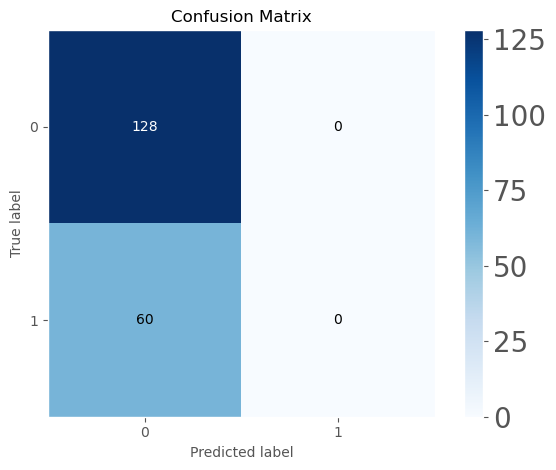

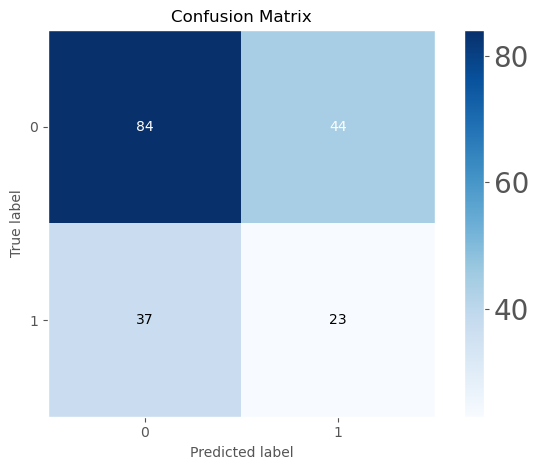

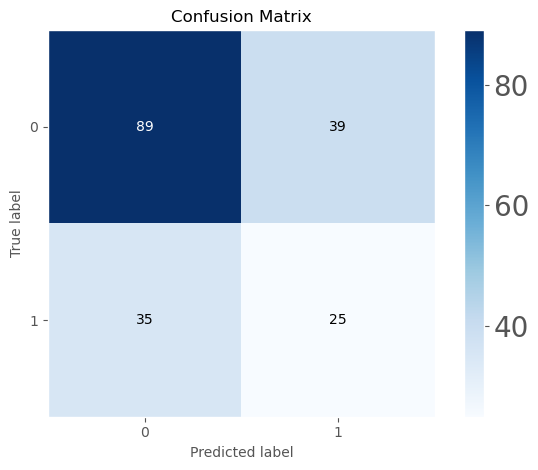

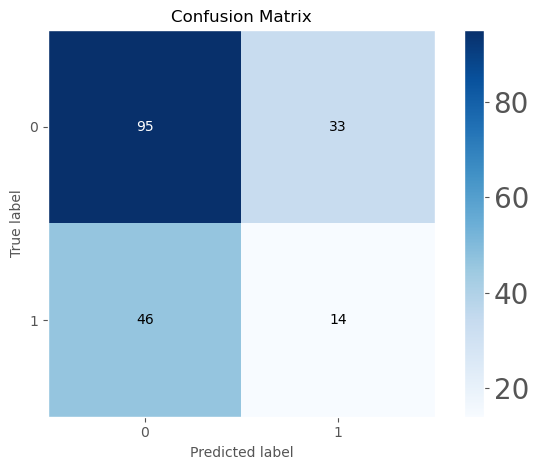

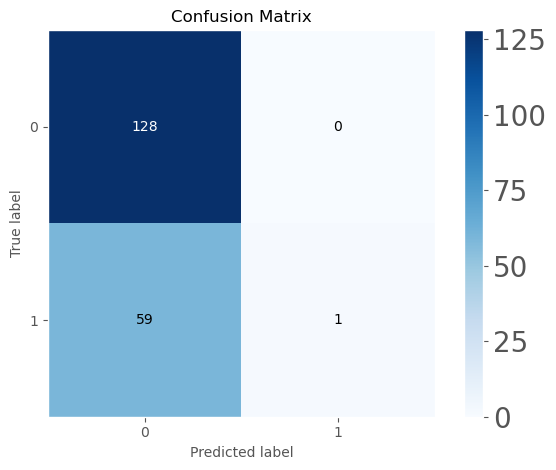

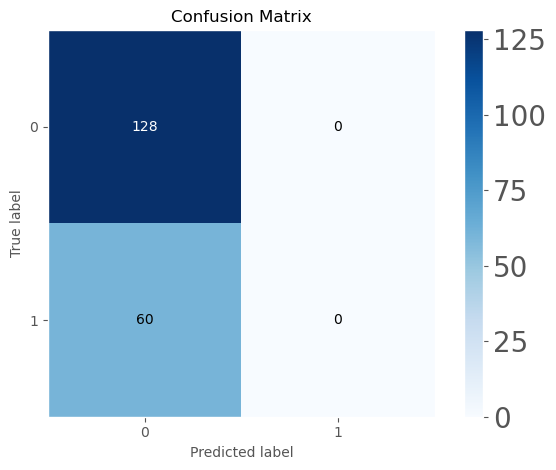

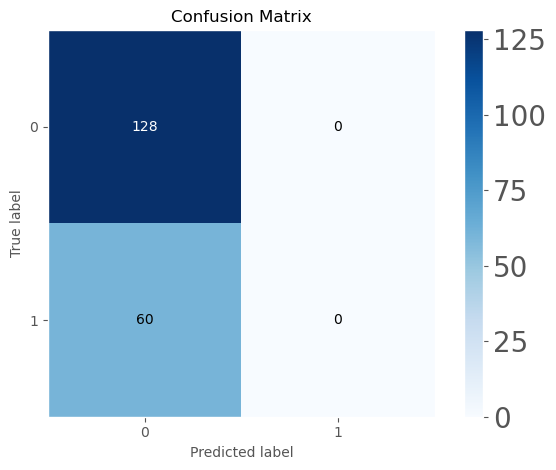

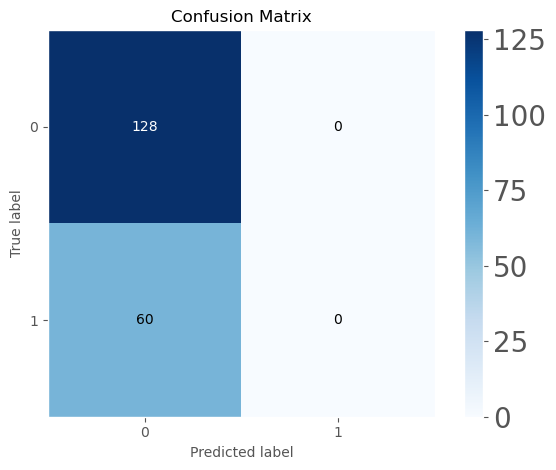

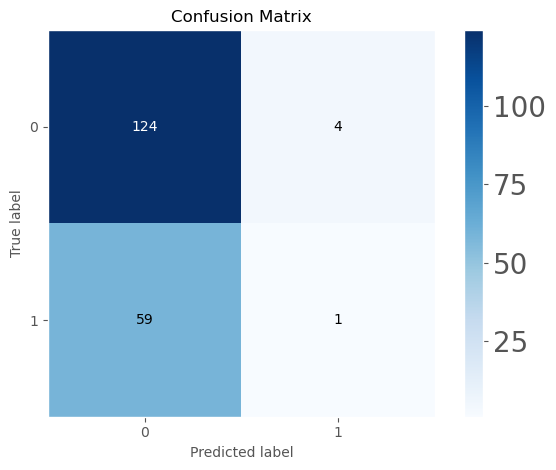

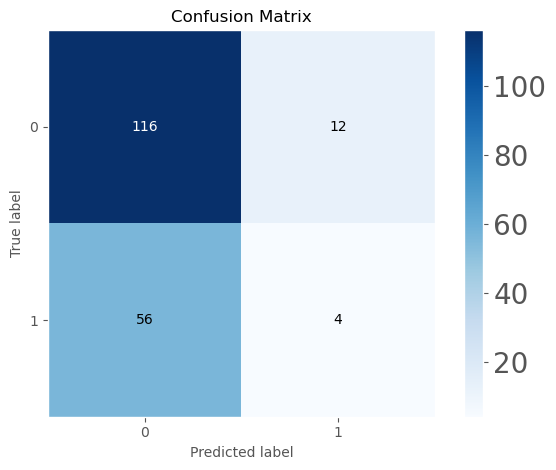

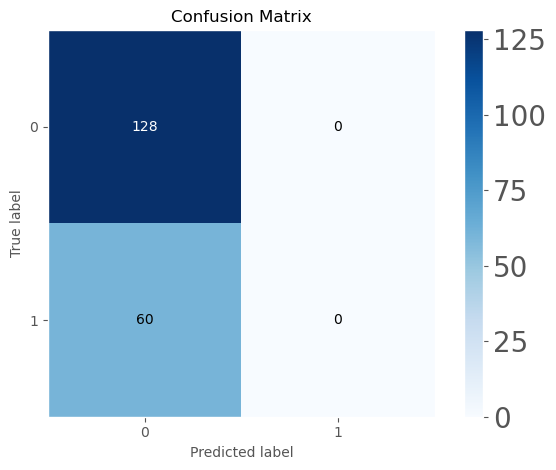

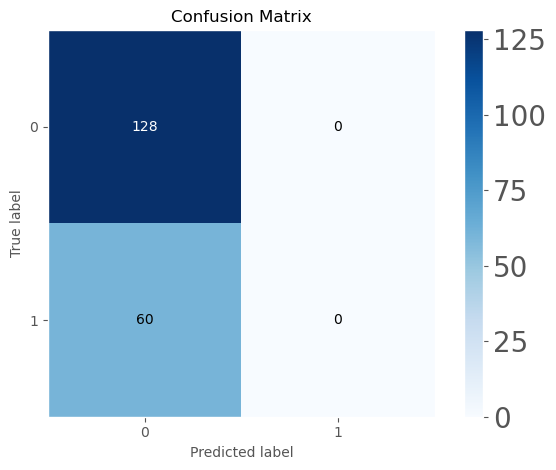

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

ZeroR = DummyClassifier(strategy = "most_frequent")
dt = DecisionTreeClassifier(criterion = 'gini')
dt2 = DecisionTreeClassifier(criterion = 'entropy')
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression ()
svc = SVC(kernel="linear", C=float(50.5))
svc2 = SVC(random_state=42)
svm = svm.SVC()
ann = MLPClassifier()
gnb = GaussianNB()
sgd = SGDClassifier(random_state=42)
ovr = OneVsRestClassifier(SVC(random_state= 50))



classifiers = [ZeroR, dt, dt2, knn,lr,svc,svc2,svm,ann,gnb,sgd,ovr]

for clf in classifiers:
    Results(clf)

In [ ]:
def Results(clf):
    plt.style.use('ggplot')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print ("Classifier: ", clf)
    print ('Train Accuracy: ', "{:.3f}".format(accuracy_score(y_train, clf.predict(X_train))* 100),'%')
    print ('Test Accuracy: ', "{:.3f}".format(accuracy_score(y_test, predictions)* 100),'%')
    print(classification_report(y_test, predictions))
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    print('─' * 60)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier


ab =  AdaBoostClassifier()
bg = BaggingClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
rf = RandomForestClassifier()

ab2 = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=1), n_estimators=30,
      learning_rate=0.5, random_state=42)


# Out-of-Bag evaluation

bg2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
hgb = HistGradientBoostingClassifier(max_iter=100,min_samples_leaf=1)

rf2 =    RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

Classifier:  AdaBoostClassifier()
Train Accuracy:  69.241 %
Test Accuracy:  64.894 %
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       128
           1       0.25      0.05      0.08        60

    accuracy                           0.65       188
   macro avg       0.46      0.49      0.43       188
weighted avg       0.54      0.65      0.56       188

────────────────────────────────────────────────────────────
Classifier:  BaggingClassifier()
Train Accuracy:  93.875 %
Test Accuracy:  61.170 %
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       128
           1       0.37      0.30      0.33        60

    accuracy                           0.61       188
   macro avg       0.53      0.53      0.53       188
weighted avg       0.59      0.61      0.60       188

────────────────────────────────────────────────────────────
Classifier:  GradientBoostingClassifier()
Train Accurac

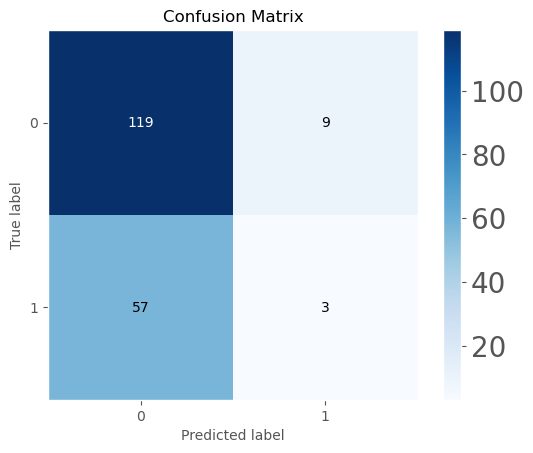

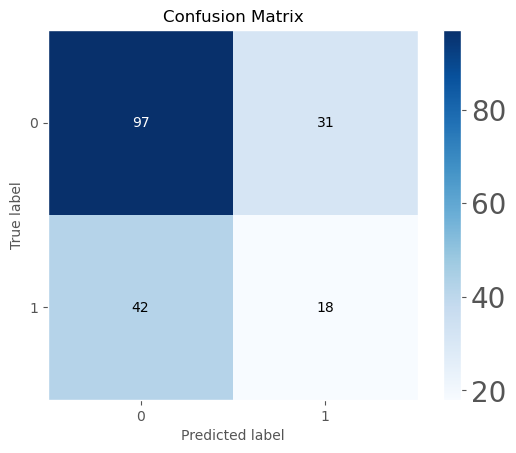

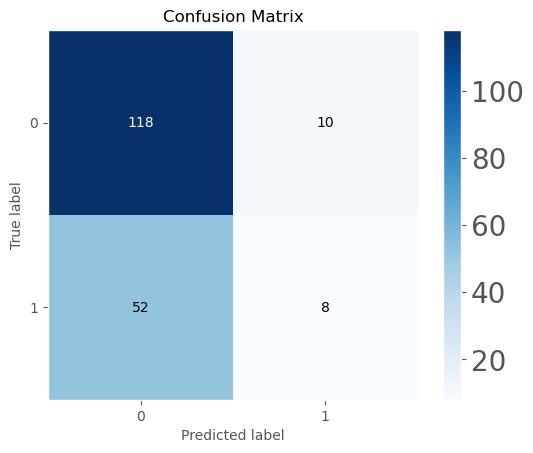

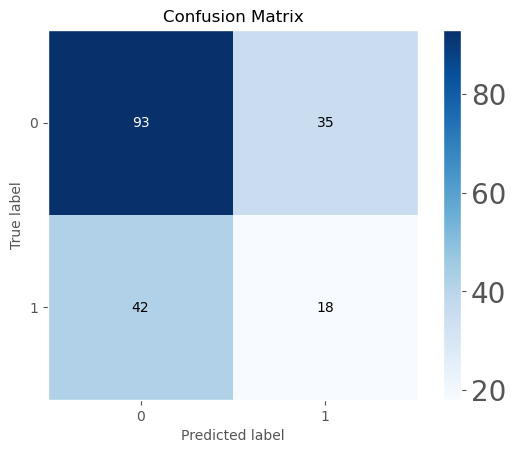

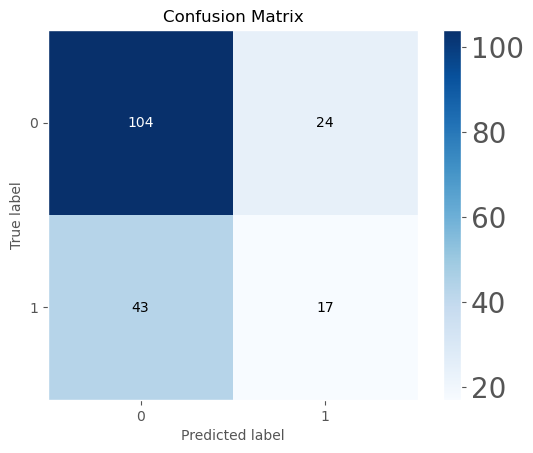

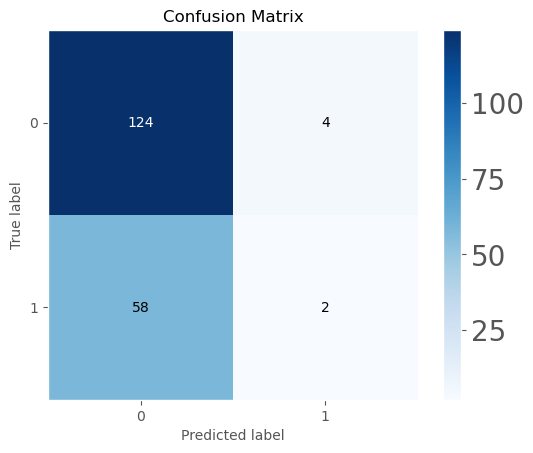

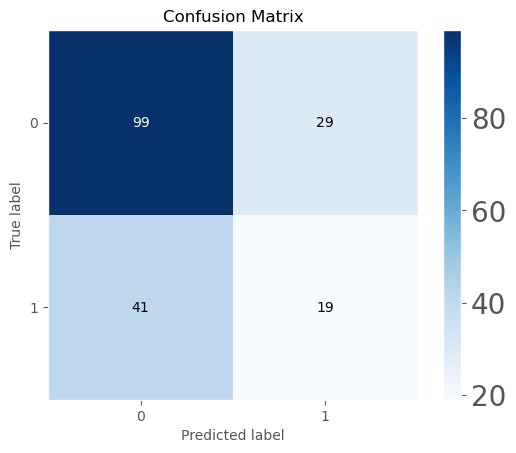

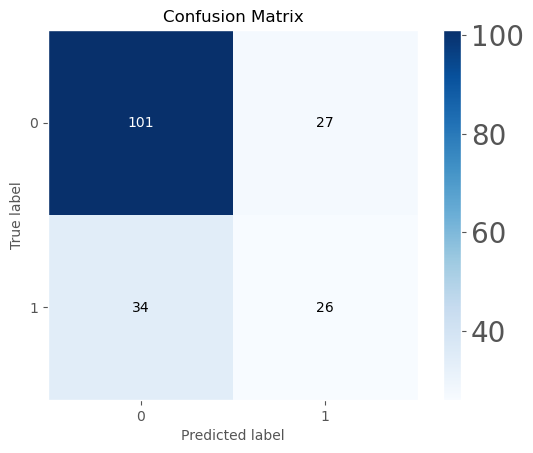

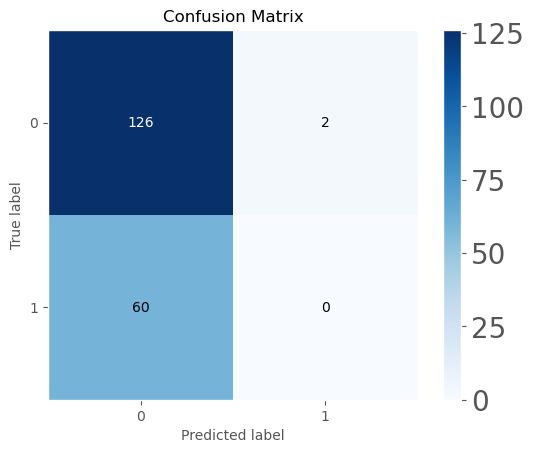

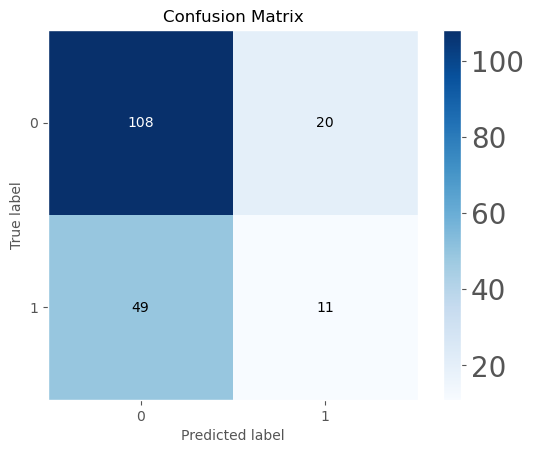

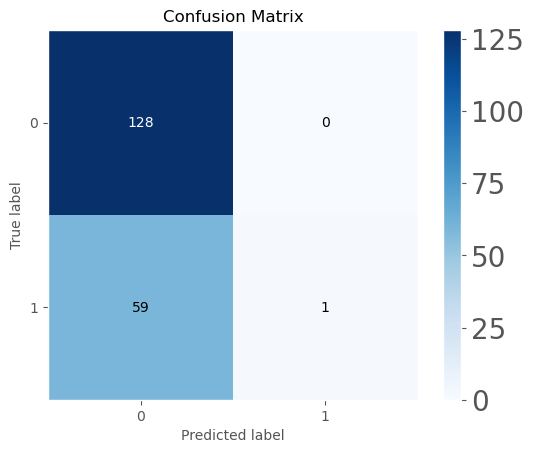

In [ ]:
classifiers = [ab,bg,gbc,etc,rf,ab2,bg2,hgb,rf2,stacking_clf, voting_clf]

for clf in classifiers:
    Results(clf)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [ ]:
dt.feature_importances_

array([0.06555969, 0.15345463, 0.23925504, 0.11289003, 0.07145678,
       0.03929062, 0.03894227, 0.1036934 , 0.07715393, 0.00941136,
       0.04247783, 0.02936823, 0.01704621])

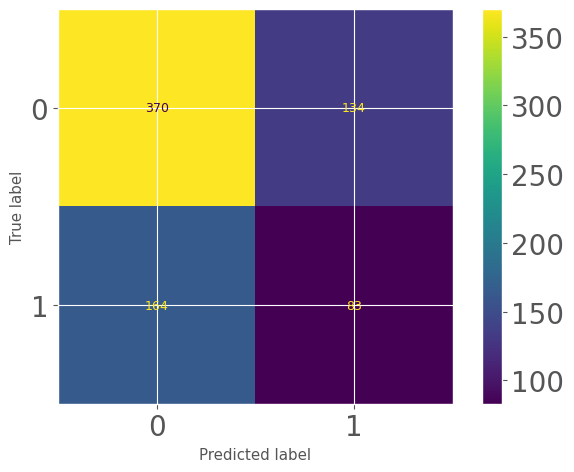

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=5)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("Sgd_algorithm_error_plot")
plt.show()

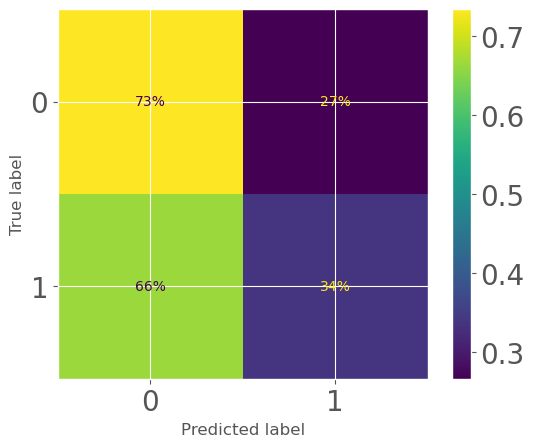

In [ ]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

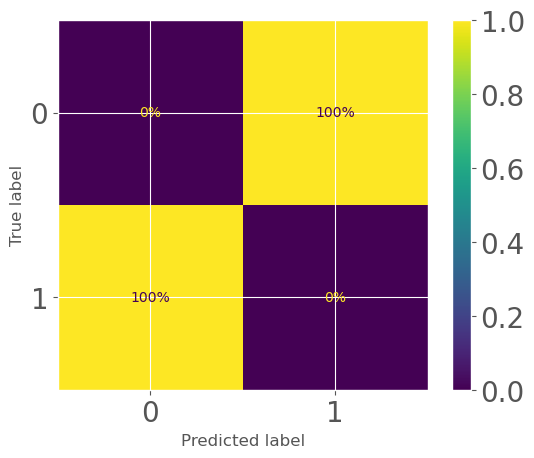

In [ ]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

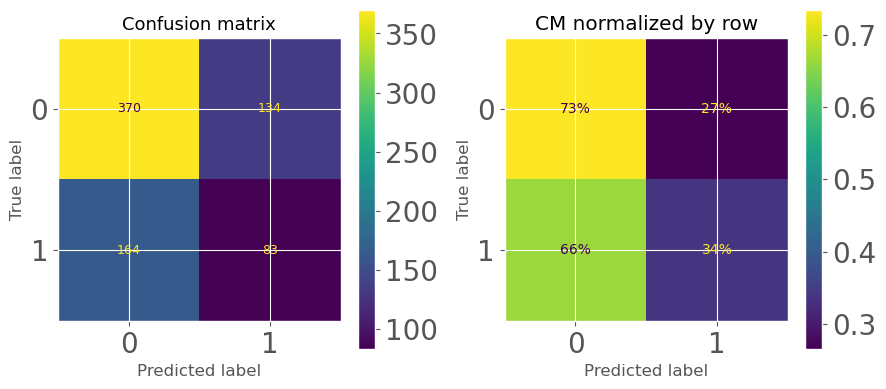

In [ ]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

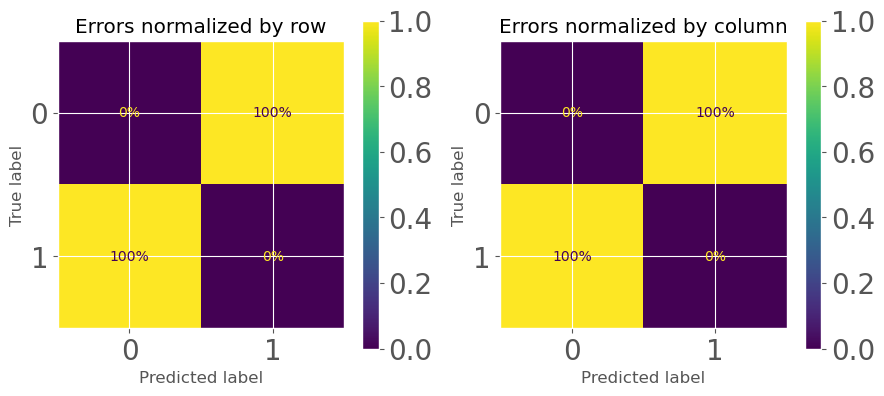

In [ ]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [ ]:

# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)
# Prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)

print ('Accuracy of Model 1 using Decision Tree Classifier:', "{:.3f}".format(accuracy_score(y_test, preds_1)* 100),'%')
print('Accuracy of Model 2 using Decision Tree Classifier:',  "{:.3f}".format(accuracy_score(y_test, preds_2)* 100),'%')
print('Accuracy of Model 3 using Decision Tree Classifier:',  "{:.3f}".format(accuracy_score(y_test, preds_3)* 100),'%')
print('Accuracy of Model 4 using Decision Tree Classifier:',    "{:.3f}".format(accuracy_score(y_test, preds_4)* 100),'%')
print('Accuracy of Model 5 using Decision Tree Classifier:',  "{:.3f}".format(accuracy_score(y_test, preds_5)* 100),'%')

Accuracy of Model 1 using Decision Tree Classifier: 58.511 %
Accuracy of Model 2 using Decision Tree Classifier: 54.255 %
Accuracy of Model 3 using Decision Tree Classifier: 54.255 %
Accuracy of Model 4 using Decision Tree Classifier: 59.043 %
Accuracy of Model 5 using Decision Tree Classifier: 57.447 %


In [ ]:
# Another manual search for hyperparameter Using CV

for depth in [1, 2, 3, 4, 5, 6, 7, 8,9,10]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    plt.style.use('ggplot')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print ("Classifier: ", clf)
    print ('Train Accuracy: ', "{:.3f}".format(accuracy_score(y_train, clf.predict(X_train))* 100),'%')
    print ('Test Accuracy: ', "{:.3f}".format(accuracy_score(y_test, predictions)* 100),'%')
    print(classification_report(y_test, predictions))
    print('─' * 60)


Classifier:  DecisionTreeClassifier(max_depth=1, random_state=42)
Train Accuracy:  67.111 %
Test Accuracy:  68.085 %
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       128
           1       0.00      0.00      0.00        60

    accuracy                           0.68       188
   macro avg       0.34      0.50      0.41       188
weighted avg       0.46      0.68      0.55       188

────────────────────────────────────────────────────────────
Classifier:  DecisionTreeClassifier(max_depth=2, random_state=42)
Train Accuracy:  67.377 %
Test Accuracy:  68.085 %
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       128
           1       0.00      0.00      0.00        60

    accuracy                           0.68       188
   macro avg       0.34      0.50      0.41       188
weighted avg       0.46      0.68      0.55       188

───────────────────────────────────────────────────

In [ ]:
# First Grid Search coding method Results

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn import svm

iris = load_iris()
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_


{'mean_fit_time': array([0.        , 0.00625072, 0.        , 0.00220232, 0.        ,
        0.        ]),
 'std_fit_time': array([0.        , 0.00765553, 0.        , 0.00440464, 0.        ,
        0.        ]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00100174, 0.00312572,
        0.        ]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.00200348, 0.00625143,
        0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [ ]:
# Save results in dataframe
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.000000      0.000000         0.000000        0.000000       1   
1       0.006251      0.007656         0.000000        0.000000       1   
2       0.000000      0.000000         0.000000        0.000000      10   
3       0.002202      0.004405         0.001002        0.002003      10   
4       0.000000      0.000000         0.003126        0.006251      20   
5       0.000000      0.000000         0.000000        0.000000      20   

  param_kernel                         params  split0_test_score  \
0          rbf      {'C': 1, 'kernel': 'rbf'}           0.966667   
1       linear   {'C': 1, 'kernel': 'linear'}           0.966667   
2          rbf     {'C': 10, 'kernel': 'rbf'}           0.966667   
3       linear  {'C': 10, 'kernel': 'linear'}           1.000000   
4          rbf     {'C': 20, 'kernel': 'rbf'}           0.966667   
5       linear  {'C': 20, 'kernel': 'linear'}           1.000000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0           0.966667           0.966667                1.0   
1                1.0           0.966667           0.966667                1.0   
2                1.0           0.966667           0.966667                1.0   
3                1.0           0.900000           0.966667                1.0   
4                1.0           0.900000           0.966667                1.0   
5                1.0           0.900000           0.933333                1.0   

   mean_test_score  std_test_score  rank_test_score  
0         0.980000        0.016330                1  
1         0.980000        0.016330                1  
2         0.980000        0.016330                1  
3         0.973333        0.038873                4  
4         0.966667        0.036515                5  
5         0.966667        0.042164                6

In [ ]:
df[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.980000
1       1       linear         0.980000
2      10          rbf         0.980000
3      10       linear         0.973333
4      20          rbf         0.966667
5      20       linear         0.966667

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
clf.best_score_ * 100, "%"

(98.00000000000001, '%')

In [ ]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

In [ ]:
#Grid Search coding method Results

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
grid_search.best_score_

0.6325298013245033

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.6329787234042553

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1       linear         0.980000
1      20          rbf         0.966667

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'HistGradientBoostingClassifier' : {
        'model': HistGradientBoostingClassifier(max_iter=100,min_samples_leaf=3),
        'params': {
            'interaction_cst': ['no_interactions', 'pairwise']
        }
    },
    'KNeighborsClassifier' : {
        'model': KNeighborsClassifier(n_neighbors=5),
        'params': {
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']


        }
    },
    'GaussianNB' : {
        'model': GaussianNB(),
        'params': {
            'priors': [None],
            'var_smoothing': [1e-09]
        }
    }


}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                             svm    0.980000   
1                   random_forest    0.973333   
2             logistic_regression    0.966667   
3  HistGradientBoostingClassifier    0.960000   
4            KNeighborsClassifier    0.973333   
5                      GaussianNB    0.953333   

                                best_params  
0                 {'C': 1, 'kernel': 'rbf'}  
1                       {'n_estimators': 1}  
2                                  {'C': 5}  
3           {'interaction_cst': 'pairwise'}  
4                     {'algorithm': 'auto'}  
5  {'priors': None, 'var_smoothing': 1e-09}

**XAI Starts here:**

In [ ]:
# !pip install lime  #XAI starts here

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], rf.predict_proba)
exp.show_in_notebook(show_table = True)

In [ ]:
X_test.head()

appeal_district  trial_district   offence  sentence  no_complainant  \
2441             0.00           0.000  0.380952       0.0        0.000000   
1812             0.75           0.750  0.761905       0.0        0.000000   
903              0.00           0.000  0.380952       0.2        0.052632   
792              0.00           0.000  0.714286       0.3        0.052632   
123              0.00           0.625  0.857143       0.7        0.000000   

      no_male_complainant  no_female_complainant  no_appealant  \
2441             0.000000               0.000000           0.3   
1812             0.000000               0.000000           0.0   
903              0.166667               0.333333           0.2   
792              0.166667               0.333333           0.2   
123              0.000000               0.000000           0.0   

      no_male_appealant  no_female_appealant  no_public_witness  \
2441           0.000000                 0.00               0.00   
1812           0.000000                 0.00               0.05   
903            0.222222                 0.25               0.05   
792            0.222222                 0.25               0.15   
123            0.000000                 0.00               0.05   

      no_eye_witness  no_defense_witness  
2441        0.000000            0.000000  
1812        0.066667            0.090909  
903         0.066667            0.090909  
792         0.266667            0.181818  
123         0.066667            0.090909

In [ ]:
y_test.head()

2441    0
1812    1
903     1
792     0
123     0
Name: scn_decision, dtype: int32

In [ ]:
exp = explainer.explain_instance(X_test.iloc[0], rf.predict_proba, num_features = 5)
exp.show_in_notebook(show_table = True)

In [ ]:
y_test.head(20)

2441    0
1812    1
903     1
792     0
123     0
1448    0
3893    0
2215    0
772     1
2705    0
838     0
2198    0
4066    0
3199    0
1232    1
1161    0
1514    1
4547    1
3554    0
4313    0
Name: scn_decision, dtype: int32

In [ ]:
exp = explainer.explain_instance(X_test.iloc[10], rf.predict_proba)
exp.show_in_notebook(show_table = True)

In [ ]:
print(X_test.iloc[10])
print(y_test.iloc[10])

appeal_district          0.875000
trial_district           0.875000
offence                  0.380952
sentence                 0.700000
no_complainant           0.052632
no_male_complainant      0.166667
no_female_complainant    0.333333
no_appealant             0.100000
no_male_appealant        0.222222
no_female_appealant      0.500000
no_public_witness        0.050000
no_eye_witness           0.066667
no_defense_witness       0.090909
Name: 838, dtype: float64
0


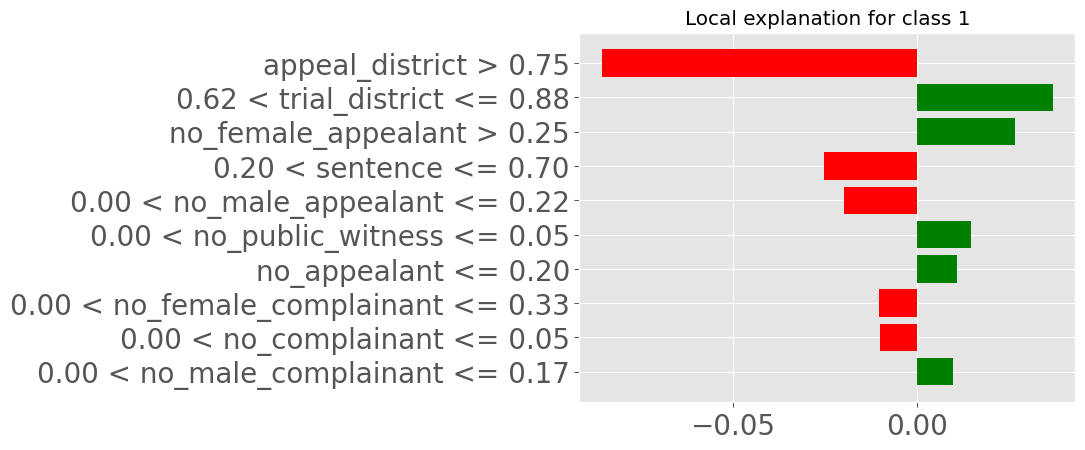

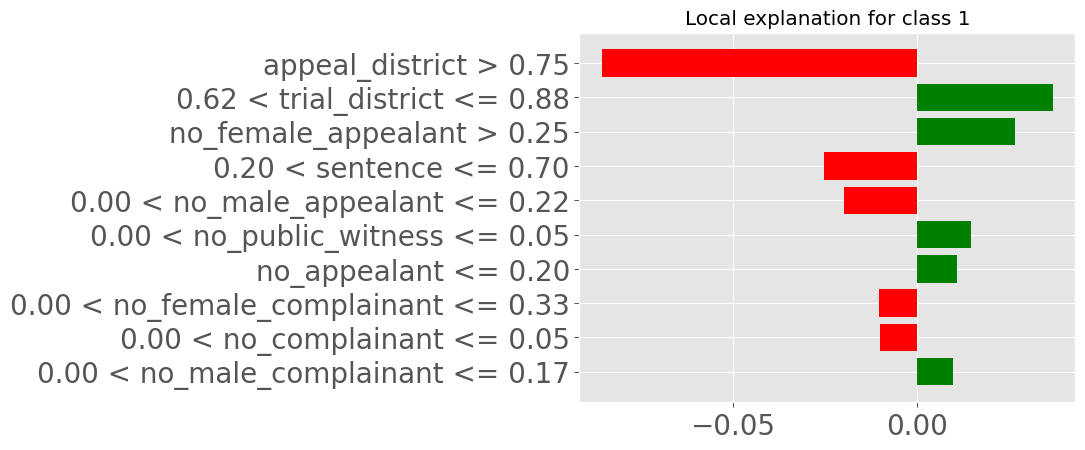

In [ ]:
exp.as_pyplot_figure()